# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Также задача — установить параметры. <br>
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.<br>

<b> Цель проекта: </b> Используюя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир. <br>

<b> Задачи проекта: </b><br>
1. Провести предобработку данных;<br>
2. Сделать расчеты и добавить данные в таблицу; <br>
3. Провести исследовательский анализ данных;<br>
4. Сделать выводы;<br> 

<b> Описание данных: </b><br> 

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br> 



На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
#Загружаем необходимые билиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Открываем файл, смотрим данные
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#Смотрим подробную информацию про файл через команду info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
Таблица содержит 23699 строк и 22 столбца. Есть значения типов: bool, float64, int64, object. <br> 
    <br> 
Внимательно просмотрим наименование столбцов и типы данных на несоответствие:<br> 
    - first_day_exposition - дата публикации - имеет строковый тип, нужно будет изменить на дату.<br> 
    - is_apartment - апартаменты - имеет строковый тип, нужно будет переводить на булевый.<br> 
    <br> 
Из не критических замечаний:<br> 
    - balcony - число балконов - имеет дробный тип, хотя может быть только целочисленным, однако на анализ не будет влиять.<br> 
    - floors_total - всего этажей в доме - имеет дробный тип, хотя количество этажей может быть только целочисленным, но для анализа это не будет мешать.
</div>

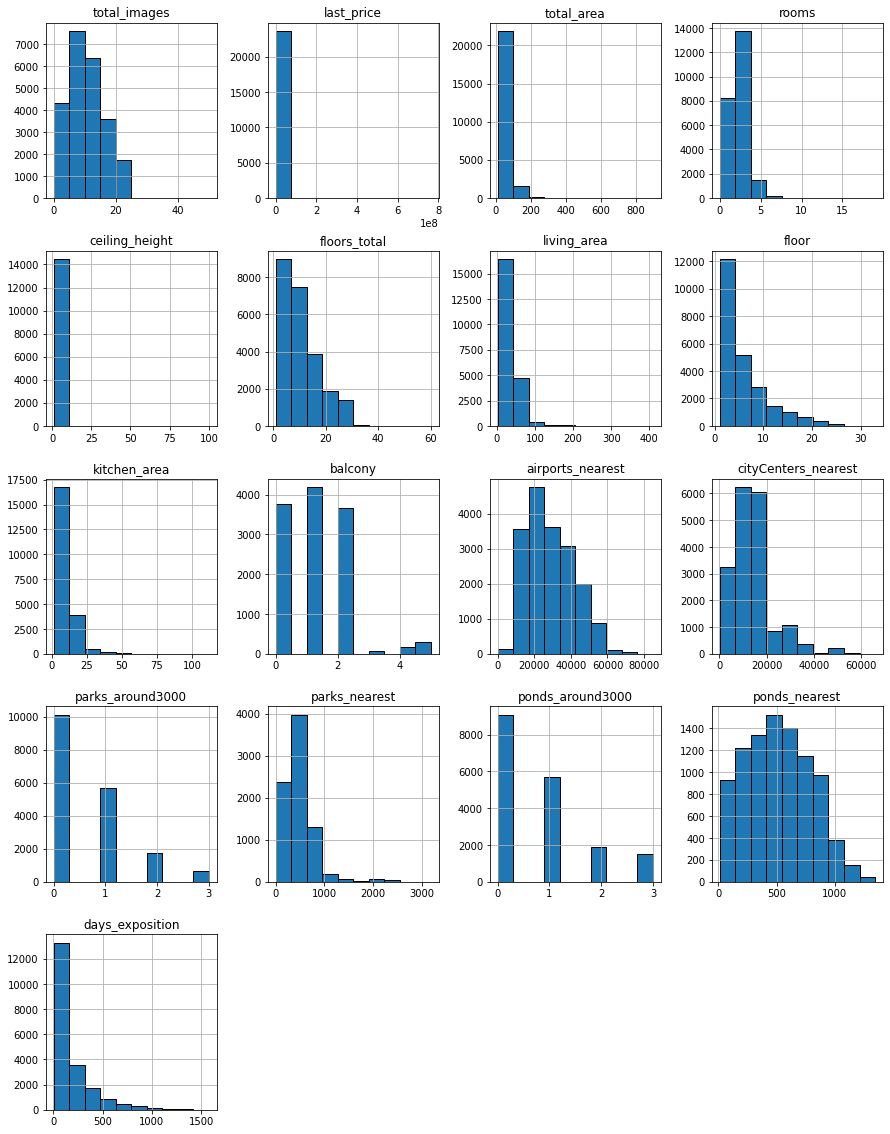

In [4]:
#Строим общую гистограмму для всех числовых столбцов таблицы и внимательно смотрим:

df.hist(figsize=(15, 20), grid=True, edgecolor='black');

<div class="alert alert-info">
- График стобца total_images - число фотографий квартиры в объявлении - не является для нас информатиным. Единственное, что может насторожить - это если нет совсем фотографий, а их количество на анализ не влияют . <br> 
- График столбца last_price - цена на момент снятия с публикации - мало информативен, видим один пик в значении около 0. В дальнейшем нужно будет разбираться с этими данными. <br>
- График стобца total_area - общая площадь квартиры в квадратных метрах (м²) - подавляющее большинство квартир с площадью до 100м2, но есть варианты с площадью и 200м2, возможно это является аномальным значением, нужно посмотреть. <br>
- График стобца rooms - число комнат - двухкомнатных квартир больше, чем однокомнатных, также есть варианты с более чем 3х комнат.<br>
- График стобца ceiling_height - высота потолков (м) - малоинформативен.<br>
    - График стобца floors_total -  всего этажей в доме - можно предположить, что большинство квартир продают в пятиэтажных домах, а также в 9этажных, меньше в 16этажных, и совсем немного в современных 20+ этажей домах.<br>
    - График стобца living_area - жилая площадь в квадратных метрах (м²) - большинство квартир с площадью до 50м2, небольшая часть до 80м2, и есть варианты >100 м2 - возможно являются аномальными значениями, нужно проверять.<br>
    - График стобца floor - этаж - большинство квартир находятся на 1-5 этажах, часть квартир на 6-10 этажах, есть небольшая доля квартир, находящихся до 20 этажа и выше.<br>
    - График стобца kitchen_area - площадь кухни в квадратных метрах (м²) - большинство квартир с площадью до 10м2, но есть также немного вариантов с площадью более 25 м2. <br>
    - График стобца balcony - число балконов - на графике видно, что есть выбросы в более 4ех балконов.<br>
    - График стобца airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - большинство квартир приходится на расстояние в 20 - 40 км, часть квартир находится на расстоянии до 60 км, и совсем небольшая доля - до 80 км.<br>
    - График стобца cityCenters_nearest -  расстояние до центра города (м) - подавляющая часть квартир находится на расстоянии 10-20 км от центра, есть часть квартир на расстоянии до 40 км, и немного вариантов в пригороде - до 60 км.<br>
    - График стобца parks_around3000 - число парков в радиусе 3 км - показывает, что в большинстве случаев парков нет, но у небольшой доли квартир есть рядом аж три парка. <br>
    - График стобца parks_nearest - расстояние до ближайшего парка (м) - из тех, кто указывает данный показатель (~4000 объявлений из 23699) парк находится в пределах 1 километра.<br>
    - График стобца ponds_around3000 - число водоёмов в радиусе 3 км - в большинстве случаев водоемов рядом нет, но свыше 5000объявлений есть по близости 1 водоем, и меньше 2000 объявлений - есть 2 и 3 водоема. <br>
    - График стобца ponds_nearest - расстояние до ближайшего водоёма (м) - из тех, кто указывает данный показатель (чуть больше 1400 объявлений из 23699) водоем находится в шаговой доступности 500 м и 1 километра.<br>
    - График стобца days_exposition - сколько дней было размещено объявление (от публикации до снятия) - большинство объявлений были размещены в первые 200 дней - в течении года, однако есть варинаты, которые были активны более 1,5-2 лет. 
    
    
    


</div>

### Предобработка данных

In [5]:
#Переименнуем столбцы согласно правилам, а также для удобства переименуем столбцы "студия" и "открытая планировка", 
#чтоб было понятно, что это булев тип


df = df.rename(
    columns={
    'cityCenters_nearest' : 'city_centers_nearest',
    'parks_around3000' : 'parks_around_3000m',
    'ponds_around3000' : 'ponds_around_3000m',
    'studio' : 'is_studio', 
    'open_plan' : 'is_open_plan'    
})

#### Пропуски

In [6]:
#Переходим к предобработке данных. Начнем с определения пропущенных значений.
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000m       5518
parks_nearest           15620
ponds_around_3000m       5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-info">
    Нам повезло, что в восьми столбцах совсем нет пропущенных значений. Незначительные пропуски (меньше 100) в столбцах высота потолков и название населённого пункта.<br>
    - В столбце "is_apartment" - почти 21тысяча пропусков (из 23699 строк), можно предположить, что владельцы квартир не указывали данные, потому что их квартира не является апартаментами, т.е. там значение "False"<br>
    - Следующие столбцы с большим количеством пропусков это "parks_nearest" и "ponds_nearest" - опять таки, можно предположить, что рядом с этими квартирами нет поблизости парков и водоемов, поэтому не стали заполнять данные, т.е. там значение "False".<br> 
    - Следующий столбец про количество балконов - свыше 11 тысяч пропусков, предположим, что в этих квартирах нет балконов, поэтому владельцы не указали данную информацию (не стали заполнять "0") <br>
    - Много пропусков в столбце "ceiling_height" - высота потолков (м) - возможно владельцы квартир не знали эту информацию. Также можно предположить, что по другим критериям (например, в "floors_total" 5 или 9 этажей) можно догадаться какая будет высота (как в обычной "хрущевке" или выше 3х метров в новых домах). Данные пропуски можно заполнить медианным значением. <br>
    - В следующих столбцах наблюдается примерно одинаковое количество пропусков:<br>
    ponds_around_3000m :       5518<br>
    parks_around_3000m :       5518<br>
    city_centers_nearest :     5519<br>
    airports_nearest :         5542<br>
    Можно предположить, что есть какой-то общий признак у этих пропусков. Будем дальше смотреть более подробнее. <br>
    - Следующие пропуски:    <br>
    kitchen_area :             2278<br>
    living_area :             1903<br>
    Возможно предположить, что площадь кухни/жилую площадь не указали владельцы студий/апартаментов/с открытой планировкой,  т.к. в таких квартирах жилая зона не делится на комнаты и кухню.<br> 
- Пропуски в столбце days_exposition - сколько дней было размещено объявление (от публикации до снятия) - возможно получились из-за технического сбоя, потому что этот показатель не рассчитывается человеком. 
    
</div><br>

##### Пропуски is_apartment

In [7]:
#Начнем заполнять пропуски с апартаментов - заполним значением "False"
df["is_apartment"] = df["is_apartment"].fillna(False)

#Проверяем количество пропусков
print (df['is_apartment'].isna().sum())

0


In [8]:
df["is_apartment"].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

<div class="alert alert-info">
Данный столбец имеет булевый тип, поэтому предположим, что там, где нет данных - значит это НЕ апартаменты - значение "False".
    С другой стороны, данный признак имеет 20924 пропусков из 23699 строк (т.е. 88,2% ),что может означать о какой то системной ошибке при сборе данных- возможно стоит обратить на это внимание коллег-разработчиков. 
        
</div><br>

##### Пропуски ponds_around_3000m, parks_around_3000m, city_centers_nearest, airports_nearest


In [9]:
#Смотрим пропуски в столбцах:
print (df['ponds_around_3000m'].isna().sum())
print (df['parks_around_3000m'].isna().sum())
print (df['city_centers_nearest'].isna().sum())
print (df['airports_nearest'].isna().sum())

5518
5518
5519
5542


In [10]:
#Создаем отдельную таблицу с пропусками в рассматриваемых параметрах:
df_t = df[(df["parks_around_3000m"].isnull()) & (df["ponds_around_3000m"].isnull()) & (df["city_centers_nearest"].isnull()) & (df["airports_nearest"].isnull())]
print (df_t.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          5518 non-null   int64  
 1   last_price            5518 non-null   float64
 2   total_area            5518 non-null   float64
 3   first_day_exposition  5518 non-null   object 
 4   rooms                 5518 non-null   int64  
 5   ceiling_height        2943 non-null   float64
 6   floors_total          5508 non-null   float64
 7   living_area           4895 non-null   float64
 8   floor                 5518 non-null   int64  
 9   is_apartment          5518 non-null   bool   
 10  is_studio             5518 non-null   bool   
 11  is_open_plan          5518 non-null   bool   
 12  kitchen_area          4803 non-null   float64
 13  balcony               2808 non-null   float64
 14  locality_name         5510 non-null   object 
 15  airports_nearest    

In [11]:
#Смотрим список городов 
df_t['locality_name'].value_counts().head (20)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               69
Приозерск                   66
Name: locality_name, dtype: int64

<div class="alert alert-info"> В списке населенных пунктов мы видим небольшие города, поселки, деревни. Таким образом, для этих квартир, рассматриваемые признаки нельзя рассчитать, поэтому у них показатели " airports_nearest", "city_centers_nearest", "parks_around_3000m", "parks_nearest", "ponds_around_3000m",  "ponds_nearest" = Nan. 
</div>

##### Пропуски "parks_nearest" и "ponds_nearest"

In [12]:
#Переходим к столбцам "parks_nearest" и "ponds_nearest".
print (df['parks_nearest'].isna().sum())
print (df['ponds_nearest'].isna().sum())

15620
14589


В предыдущем пункте мы видели, что данных нет, потому что квартиры находятся в небольших населенных пунктах (у которых нет рядом аэропорта,центра города, прудов и парков). 
Проверим пропуски для квартир, у которых есть в округе парк и нет пропусков значений.(Потому что, если парков нет, то и указывать "parks_nearest" не будут.)

In [13]:
#Создадим таблицу с условиями, где есть в округе парк и нет пропусков значений
t= df[(df['parks_around_3000m']!= 0) & (~df['parks_around_3000m'].isna())]
#проверим пропуски:
t['parks_nearest'].isna().sum()

0

Видим, что в выбранных данных пропусков нет.
Также проверим с водоемами. Т.е. проверим наличие пропусков у квартир, где есть поблизости водоемы и нет пропусков.

In [14]:
#Тоже самое проделаем с водоемами:
t= df[(df['ponds_around_3000m']!= 0) & (~df['ponds_around_3000m'].isna())]
t['ponds_nearest'].isna().sum()

0

Здесь тоже пропусков нет.

<div class="alert alert-info">
    Мы проверили те квартиры, у которых поблизости есть парки и водоемы ("parks_around_3000m" и "ponds_around_3000m" >0) и нет пропусков, и среди них в значениях "parks_nearest" и "ponds_nearest" нет пропусков . Таким образом, можно предположить наличие пропусков, потому что у этих квартир нет рядом парков и водоемов   
    </div>

##### Пропуски balcony

In [15]:
#Смотрим количество пропусков в столбце "число балконов"
df['balcony'].isna().sum()

11519

In [16]:
#Заполняем пропуски значениями "0"
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

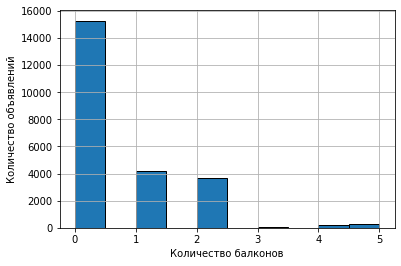

In [17]:
#Смотрим на график столбца
df['balcony'].hist(edgecolor='black');
plt.xlabel("Количество балконов");
plt.ylabel("Количество объявлений");

In [18]:
#Смотрим квартиры с более чем 3 балконами
print (len(df[df['balcony']>3]))
df[df['balcony']>3].head(10)

487


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.00,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.90,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.50,16.0,NaN,16,False,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20,33000000.0,180.0,2017-02-17T00:00:00,3,2.90,9.0,86.00,8,False,...,24.0,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13,3200000.0,51.7,2019-01-22T00:00:00,2,2.65,16.0,29.20,5,False,...,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
263,12,39900000.0,140.6,2016-11-19T00:00:00,2,3.50,8.0,39.80,7,False,...,49.2,4.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN
267,2,14700000.0,120.0,2018-09-07T00:00:00,3,2.75,20.0,63.00,18,False,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.0,2018-10-19T00:00:00,3,2.80,25.0,47.00,3,False,...,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN
336,10,7700000.0,79.0,2019-03-11T00:00:00,3,2.90,12.0,47.00,11,False,...,15.0,5.0,Санкт-Петербург,38622.0,14116.0,0.0,NaN,0.0,NaN,NaN
371,11,7300000.0,65.0,2018-09-12T00:00:00,2,NaN,12.0,30.04,2,False,...,10.2,5.0,Санкт-Петербург,18621.0,17623.0,1.0,1510.0,2.0,372.0,92.0


Видим, что у квартир с повышенным количеством балконов - идет много комнат 4-5. Соответственно, можно предложить, что для таких многокомнатных квартир это вполне возможно.
Однако, для квартир с меннее тремя комнатами такое не возможно (ведь у однокомнатной квартиры не может быть более двух балконов, а у двухкомнатной квартиры - не более трех, предположив, что у каждой комнаты и кухни есть выход на балкон). Предположим, что была допущена ошибка и изменим данные на количество балконов = 3 .

In [19]:
#Для 1-2х комнатных квартир с более чем 4 балконами, заменяем на 3 балкона. 
df['balcony'].loc[(df['rooms']<3) & (df['balcony']>=4)] = 3

In [20]:
#Смотрим тип данных
df.balcony.dtypes

dtype('float64')

In [21]:
#Заменяем тип данных на целочисленный.
df['balcony'] = df['balcony'].astype(int)
df.balcony.dtypes

dtype('int64')

<div class="alert alert-info">
По столбцу "balcony" мы заменили пропуски на "0" - предположив, что владельцы квартир не указали количество балконов, потому что их нет. Увидели на графике небольшой выброс в 4-5 балконов. Заменили тип данных с дробного на целочисленный. 
    </div><br>

##### Пропуски floors_total

In [22]:
#Проверяем количество пропусков в столбце "всего этажей в доме"
df['floors_total'].isna().sum()

86

In [23]:
#Там где нет информации про этажность дома заполняем значением текущего этажа, на котором находится квартира.
#Проверяем количество пропусков после замены.
df.loc[df["floors_total"].isna(), "floors_total"] = df.loc[df["floors_total"].isna(), "floor"]
df['floors_total'].isna().sum()

0

In [24]:
#Смотрим тип данных. Меняем его на целочисленный тип. 
print (df.floors_total.dtypes)
df['floors_total'] = df['floors_total'].astype(int)
df.floors_total.dtypes

float64


dtype('int64')

<div class="alert alert-info">
По столбцу "floors_total" мы заменили пропуски на значение этажа, на котором находится квартира. Поменяли тип данных на целочисленный. 
</div><br>

##### Пропуски ceiling_height

In [25]:
#Смотрим количество пропусков в столбце "высота потолков"
df['ceiling_height'].isna().sum()

9195

In [26]:
#Группируем квартиры по значению "всего этажей в доме" и выводим медианное значение высоты потолков
df.groupby('floors_total')['ceiling_height'].median()

floors_total
1      2.80
2      2.70
3      2.80
4      3.00
5      2.55
6      3.00
7      3.00
8      2.80
9      2.55
10     2.60
11     2.75
12     2.65
13     2.70
14     2.60
15     2.70
16     2.70
17     2.70
18     2.70
19     2.75
20     2.75
21     2.70
22     2.75
23     2.75
24     2.75
25     2.75
26     2.66
27     2.70
28     2.60
29     2.60
33      NaN
34     2.65
35     2.70
36    14.85
37     1.75
52     2.65
60     2.88
Name: ceiling_height, dtype: float64

In [27]:
#Создаем функцию, которая распределит квартиры на категории по этажности домов
def categorize_floors_total(floors):
    try:
        if 1 <= floors <= 3:
            return 'Малоэтажные дома'
        elif 4 <= floors <= 5:
            return 'Пятиэтажки'
        elif 6 <= floors <= 9:
            return 'Многоэтажные дома'
        elif 10 <= floors <= 20:
            return 'Дома повышенной этажности'
        elif floors > 20:
            return 'Высотные дома'
    except:
        pass

Посмотрели классификацию домов по этажности на сайте http://liding12.ru/articles/klassifikatsiya-zdaniy/ 

In [28]:
#Разделили дома по категории этажности в отдельном столбце categorize_floors_total 
df['categorize_floors_total'] = df['floors_total'].apply(categorize_floors_total)

In [29]:
#Создали функцию, которая будет заполнять пропуски медианным значением по категории высоты потолков
for f in df['categorize_floors_total'].unique():
    df.loc[(df['categorize_floors_total'] == f) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['categorize_floors_total'] == f), 'ceiling_height'].median()
    

In [30]:
#Проверяем количество пропусков после заполнения и смотрим таблицу
(df['ceiling_height'].isna().sum())


0

In [31]:
#Для удобства округляем данные по высоте потолков и смотрим уникальные значения.
df['ceiling_height'] = df['ceiling_height'].round(2)
df['ceiling_height'].unique()

array([  2.7 ,   2.6 ,   3.03,   2.75,   2.5 ,   2.67,   2.56,   3.05,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Видим, что есть выбивающие значения в 25, 32, 27, 24, 20, 100, 26, и др. Спрашиваем гугл о максимальной высоте потолков = 10 м. 
Можно предположить, что были введены неккоретно данные, а на самом деле вместо 25 = 2,5, 32 = 3,2. 
Делим на 10

In [32]:
#Делим на 10 выбивающиеся значения высоты потолков
df.loc[df['ceiling_height']>11, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].unique()

array([ 2.7 ,  2.6 ,  3.03,  2.75,  2.5 ,  2.67,  2.56,  3.05,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Согласно СНиП 31-01-2003, минимальной высотой потолка может быть 2,4м. Те значения, которые меньше 2,4 м заменим на средние значения по категориям этажности (как делали выше) 

In [33]:
#Видим, что есть минимальные значения высоты потолков
df['ceiling_height'].sort_values().head(20)

22590    1.00
5712     1.20
15061    1.40
16934    1.75
4212     2.00
20520    2.00
19329    2.00
17496    2.00
16446    2.00
5850     2.00
19098    2.00
11352    2.00
16884    2.00
22960    2.00
552      2.00
2572     2.00
12755    2.20
17794    2.25
20507    2.26
1582     2.30
Name: ceiling_height, dtype: float64

In [34]:
#Заменяем минимальные значения "ceiling_height" на медиану по категориям этажности дома "categorize_floors_total".
for f in df['categorize_floors_total'].unique():
    df.loc[(df['categorize_floors_total'] == f) & (df['ceiling_height']<2.4), 'ceiling_height'] = \
    df.loc[(df['categorize_floors_total'] == f), 'ceiling_height'].median()

In [35]:
#Округляем значения и проверяем минимальные и максимальные значения высоты потолков.
df['ceiling_height'] = df['ceiling_height'].round(2)
df['ceiling_height'].describe()

count    23699.000000
mean         2.703478
std          0.243422
min          2.400000
25%          2.600000
50%          2.650000
75%          2.750000
max         10.300000
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
По столбцу "высота потолков" мы заменили пропуски на медианнное значения по категориям этажности домов. Убрали максимальные выбросы - разделив значения на 10. Убрали минимальные выбросы - заменив на средние значения по категориям этажности домов. Тип данных - дробный, не меняли.
    
    
</div> <br>

##### Пропуски locality_name

In [36]:
#Смотрим уникальные значения и их количество в названии населенного пункта
print (df['locality_name'].nunique())
df['locality_name'].unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [37]:
#Производим замену ё на е. И делаем замену всех видов поселков на "поселок" , также уравниваем "садовое товарищество"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок' )
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок' )
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок' )
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество' )
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок' )
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок' )

In [38]:
#Просматриваем значения после замены дубликатов.
print (df['locality_name'].nunique())
df['locality_name'].unique()

318


array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [39]:
#Смотрим пропуски в названиях населеного пункта
print (df['locality_name'].isna().sum())
df[df['locality_name'].isna()].head(10)

49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5,50.80,2,False,...,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,Пятиэтажки
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.60,4,42.60,2,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,Пятиэтажки
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.75,24,15.60,3,False,...,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,Высотные дома
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.75,24,33.10,21,False,...,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,Высотные дома
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.60,5,30.80,5,False,...,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,Пятиэтажки
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8,39.62,7,False,...,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,Многоэтажные дома
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4,52.30,3,False,...,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,Пятиэтажки
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.60,7,NaN,6,False,...,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,Многоэтажные дома
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.60,7,59.10,5,False,...,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,Многоэтажные дома
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.75,24,20.00,23,False,...,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,Высотные дома


Для тех квартир, где указаны данные "city_centers_nearest" можно посмотреть, если указанное расстрояние находится в пределах значений по "Санкт-Петербургу", то можно будет заменить пропуски.  


In [40]:
#Находим медианное расстояние для Санкт-Петербурга
t_city = df.groupby('locality_name')['city_centers_nearest'].median()
print (t_city.sort_values().round(1).head())
median_spb = t_city['Санкт-Петербург']
median_spb

locality_name
Санкт-Петербург      12244.5
поселок Парголово    19311.0
поселок Мурино       21888.0
поселок Стрельна     23506.0
поселок Шушары       24212.0
Name: city_centers_nearest, dtype: float64


12244.5

In [41]:
#Находим значения, где есть пропуск в наименовании населенного пункта и расстояние от центра меньше найденного значения, 
#и присваиваем "Санкт-Петербург"
df['locality_name'].loc[(df['locality_name'].isna()) & (df['city_centers_nearest']<median_spb)] = 'Санкт-Петербург'

In [42]:
#Проверяем сколько осталось пропусков
df['locality_name'].isna().sum()

23

In [43]:
#В оставшиесяпропуска записываемзначение "Unknown"
df['locality_name'] = df['locality_name'].fillna('Unknown')

<div class="alert alert-info">
По столбцу "locality_name" мы обработали неявные дубликаты, заменели "ё" на "е", а также повторяющиеся названия поселков на "поселок" и "садовое товарищество". Посмотрели количество пропусков. Оставшиеся пропуски заменили на значение "Unknown". 
    
    
</div> <br>

##### Пропуски  kitchen_area, living_area

In [44]:
#Смотрим пропуски в столбце:
df['kitchen_area'].isna().sum()

2278

In [45]:
#Выводим описание значений:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Видим, что есть минимальные аномальные значения,которые нужно будет обработать.

In [46]:
#Находим долю площади кухни от общей площади квартиры по всему датафрейму
df[['kitchen_area', 'living_area', 'total_area']]
df['kitchen_kf'] = (df['kitchen_area']/df['total_area']).round(2)
print (df[['kitchen_area', 'living_area', 'total_area', 'kitchen_kf']].head())

# Находим ее медианное значение .  
median_kitchen = df['kitchen_kf'].median().round(2)
median_kitchen

   kitchen_area  living_area  total_area  kitchen_kf
0          25.0         51.0       108.0        0.23
1          11.0         18.6        40.4        0.27
2           8.3         34.3        56.0        0.15
3           NaN          NaN       159.0         NaN
4          41.0         32.0       100.0        0.41


0.17

In [47]:
#Заполняем пропуски: медианное значение доли площади кухни умножаем на общую площадь квартиры 
df['kitchen_area'].loc[df['kitchen_area'].isna()] = df['total_area'].loc[df['kitchen_area'].isna()]*median_kitchen

print(df['kitchen_area'].isna().sum())
df[['kitchen_area', 'living_area', 'total_area']].head(10)

0


,kitchen_area,living_area,total_area
0,25.00,51.00,108.00
1,11.00,18.60,40.40
2,8.30,34.30,56.00
3,27.03,NaN,159.00
4,41.00,32.00,100.00
5,9.10,14.40,30.40
6,14.40,10.60,37.30
7,18.90,NaN,71.60
8,8.81,15.43,33.16
9,6.50,43.60,61.00


Согласно гуглу, кухня в жилых помещениях должна быть не менее 5м2. Поэтому убираем значения, которые ниже этого значения.

In [48]:
#Оставляем значения площади кухни больше 5м2 
df = df[df['kitchen_area'] >= 5]

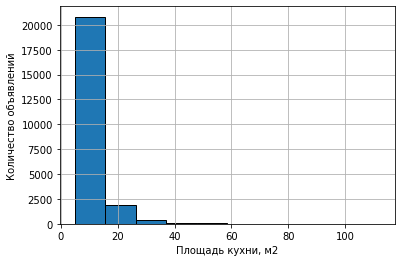

In [49]:
#Смотрим гистограмму:
df['kitchen_area'].hist(edgecolor='black');
plt.xlabel("Площадь кухни, м2");
plt.ylabel("Количество объявлений");

In [50]:
#Удаляем вспомогательный столбец
df = df.drop('kitchen_kf', axis=1)

<div class="alert alert-info">
По столбцу площадь кухни мы : расчитали коэфициент площади кухни от общей площади квартиры по всем данным, потом использовали этот коэфициент для заполнения пропусков: коэфициент умножили на общую площадь. 
Также убрали минимальные значения площади менее 5м2. 
    </div>

##### Пропуски living_area

In [51]:
#Смотрим количество пропусков
df['living_area'].isna().sum()

1830

In [52]:
#Смотрим описание данных.
df['living_area'].describe()

count    21399.000000
mean        34.740923
std         22.118856
min          2.000000
25%         18.900000
50%         30.100000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64

In [53]:
#Находим долю жилой площади от общей площади квартиры по всему датафрейму,
#и потом ее медианное значение . 
df['living_kf'] = (df['living_area']/df['total_area']).round(2)

print (df[['kitchen_area', 'living_area', 'total_area', 'living_kf']].head(10))
median_liv = df['living_kf'].mean().round(2)
median_liv

   kitchen_area  living_area  total_area  living_kf
0         25.00        51.00      108.00       0.47
1         11.00        18.60       40.40       0.46
2          8.30        34.30       56.00       0.61
3         27.03          NaN      159.00        NaN
4         41.00        32.00      100.00       0.32
5          9.10        14.40       30.40       0.47
6         14.40        10.60       37.30       0.28
7         18.90          NaN       71.60        NaN
8          8.81        15.43       33.16       0.47
9          6.50        43.60       61.00       0.71


0.56

In [54]:
#Заполняем пропуски: медианное значение доли жилой площади умножаем на общую площадь квартиры 
df['living_area'].loc[df['living_area'].isna()] = df['total_area'].loc[df['living_area'].isna()]*median_liv
print (df['living_area'].isna().sum())
df[['kitchen_area', 'living_area', 'total_area']].head(10)

0


,kitchen_area,living_area,total_area
0,25.00,51.000,108.00
1,11.00,18.600,40.40
2,8.30,34.300,56.00
3,27.03,89.040,159.00
4,41.00,32.000,100.00
5,9.10,14.400,30.40
6,14.40,10.600,37.30
7,18.90,40.096,71.60
8,8.81,15.430,33.16
9,6.50,43.600,61.00


Согласно гуглу и СНиП 31-01-2003, минимальная жилая площадь должна быть не менее 14м2 (https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php?utm_referrer=https%3A%2F%2Fwww.google.com%2F) 

In [55]:
#Оставляем значения жилой площади больше 14м2 
df = df[df['living_area'] >= 14]
df['living_area'].describe()

count    22938.000000
mean        35.158763
std         22.382040
min         14.000000
25%         19.505000
50%         30.400000
75%         42.675000
max        409.700000
Name: living_area, dtype: float64

In [56]:
#Удаляем вспомогательный столбец
df = df.drop('living_kf', axis=1)

<div class="alert alert-info">
По столбцу жилой площади мы : расчитали коэфициент жилой площади от общей площади квартиры по всем данным, потом использовали этот коэфициент для заполнения пропусков: коэфициент умножили на общую площадь. 
Также убрали минимальные значения площади менее 14м2. 
    </div>

##### Пропуски days_exposition 

In [57]:
#Смотрим количество пропусков в данном столбце
df['days_exposition'].isna().sum()

3117

In [58]:
#Смотрим количество пропусков в столбце "дата публикации"
df['first_day_exposition'].isna().sum()

0

У всех объявлений есть дата публикаций, значит 3126 квартир еще не были проданы и их объвления были актуальны на момент формирования датасета. 

In [59]:
#Смотрим на данные
df[df['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Дома повышенной этажности
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24,40.096,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Высотные дома
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22,22.400,3,False,...,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Высотные дома
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9,30.300,7,False,...,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,Многоэтажные дома
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24,29.700,9,False,...,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,Высотные дома
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9,18.000,7,False,...,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,Многоэтажные дома
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2,94.000,2,False,...,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,Малоэтажные дома
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9,39.000,8,False,...,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,Многоэтажные дома
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.70,10,38.080,6,False,...,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дома повышенной этажности
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.75,2,27.460,1,False,...,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Малоэтажные дома


По таблице не видно каких-либо отклонений.

In [60]:
#Смотрим на данные постолбцу
df['days_exposition'].describe()

count    19821.000000
mean       182.354725
std        221.034083
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [61]:
#Проверяем минимальное значение
df[df['days_exposition'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
1632,19,4000000.0,49.9,2019-05-01T00:00:00,2,2.5,9,25.0,1,False,...,0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,Многоэтажные дома


Со сроком в один день - была продана 2х комнатная квартира в Санкт-Петербурге за 4млн. рублей. Никаких замечаний нет к данным.

In [62]:
#Смотрим на максимальное значение
df[df['days_exposition'] == 1580]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
18843,11,3500000.0,48.2,2014-12-15T00:00:00,2,2.5,5,27.4,2,False,...,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,Пятиэтажки


Дольше 4х лет продовалась 2х комнатная квартира в деревне Новое Девяткино за 3,5 млн. Вполне возможно такое. 

<div class="alert alert-info">
    По столбцу "days_exposition" есть пропуски, но с ними ничего делать не нужно, предположив, что данные квартиры еще не были сняты с публикации на момент формирования датасета. Пропуск в этой колонке означает, что объект не продан и объявление не закрыто. Поэтому заполнять пропуски в этом столбце не надо - они не случайные и существенно влияют на статистику.
    <br><br>
Если рассматривать распределение пропусков относительно года выставления на продажу, можно заметить, что большая часть пропущенных значений - в 2019 году. Больше половины объектов, выставленных на продажу в 2019 году не имеет рассчитанного "времени продажи квартиры". Также высокая доля пропусков, хотя и меньшая - в 2018 году. Получается, чем свежей объявление - тем выше вероятность пропуска в этой колонке. 

</div>

 #### Обработка Аномальных значений:


##### Аномальные значения last_price

In [63]:
#Смотрим описание данных:
df['last_price'].describe()

count    2.293800e+04
mean     6.648502e+06
std      1.103913e+07
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.890000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Из описания видим, что есть минимальное значение в 12 190 рублей, и максимальное в 763 000 000 рублей. Медиана цены составляет 4 700 000 рублей, среднее значение = 6 628 045 рублей. 

In [64]:
#Смотрим на минимальное значение
df[df['last_price'] == 12190.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Высотные дома


В данном случае можно предположить, что была ошибка в указании цены, не в рублях, а в тыс. рублях. Т.к. квартира 2х-комнатная, с большой общей площадью в высотном доме, в черте города Санкт-Петербурга. 
Здесь можно цену умножить на 1000

In [65]:
#Умножаем на 1000 минимальное значение:
df.loc[df["last_price"] == 12190.0, "last_price"] = df.loc[df["last_price"] == 12190.0, "last_price"] * 1000

In [66]:
#Проверяем минимальные значения:
df['last_price'].sort_values().head(10)

17456    430000.0
14911    430000.0
16274    440000.0
16219    450000.0
17676    450000.0
9581     450000.0
5698     450000.0
23484    470000.0
21912    470000.0
18867    470000.0
Name: last_price, dtype: float64

In [67]:
#Смотрим максимальное значение:
df[df['last_price'] == 763000000.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.7,10,250.0,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Дома повышенной этажности


В данном случае имеем дело с элитной недвижимостью: количество комнат = 7, общая площадь = 400 м2, на 10 этаже,  в центре города (да еще и рядом с парком и тремя прудами). Здесь исправлять ничего не нужно.

1000000.0
15500000.0


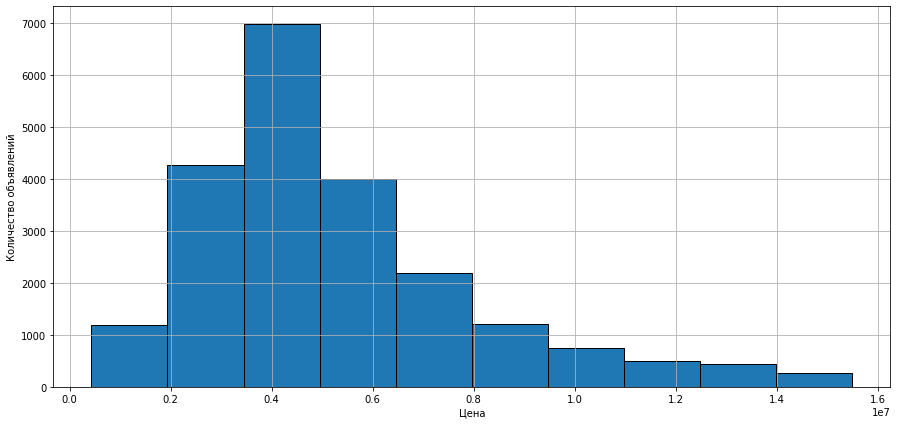

In [68]:
#Смотрим 1 и 95 квантили по столбцу
print (df['last_price'].quantile(0.01))
print (df['last_price'].quantile(0.95))

#СМотрим гистограмму распределения последней цены:
df[df["last_price"] < df['last_price'].quantile(0.95)]["last_price"].hist(edgecolor="black", figsize=(15,7));
plt.xlabel("Цена");
plt.ylabel("Количество объявлений");

Немного сократив данные для вывода гистограмы через квантили,мы видим график распределения Пуассона. Пик приходится на 4 млн.рублей, большинство данных расположены в диапазоне от 2 до 6 млн.рублей. 


In [69]:
#Смотрим выборку с наименьшими ценами, до 1млн.рублей
df[df['last_price']< df['last_price'].quantile(0.01)].sort_values(by='last_price').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.75,3,30.240,3,False,...,0,поселок Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Малоэтажные дома
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.75,2,16.000,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Малоэтажные дома
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.60,5,22.400,1,False,...,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Пятиэтажки
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.75,1,23.000,1,False,...,0,поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,Малоэтажные дома
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.60,5,30.300,3,False,...,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,Пятиэтажки
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2,21.560,1,False,...,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Малоэтажные дома
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.60,5,17.300,4,False,...,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0,Пятиэтажки
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,2.75,3,20.720,3,False,...,0,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Малоэтажные дома
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,2.60,5,32.000,3,False,...,0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Пятиэтажки
23484,11,470000.0,44.5,2018-07-02T00:00:00,2,2.75,2,28.000,2,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0,Малоэтажные дома


Тут видим, что квартиры находятся в деревнях,поселках, в основном 1-2х комнатные,с небольшой площадью. Вполне вероятно,что данные цены адекватны, с ними ничего делать не стоит. 

In [70]:
#Смотрим выборку с наибольшими ценами
df[df['last_price']> df['last_price'].quantile(0.95)].sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.70,10,250.00,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Дома повышенной этажности
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.70,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Высотные дома
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.60,9,204.00,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Многоэтажные дома
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.00,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Многоэтажные дома
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.00,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Многоэтажные дома
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6,63.70,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Многоэтажные дома
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7,182.80,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,Многоэтажные дома
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7,218.00,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,Многоэтажные дома
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,2.60,7,280.00,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,Многоэтажные дома
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,2.60,8,132.00,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0,Многоэтажные дома


Здесь видим картину с элитным жильем: общие площади свыше 200м2, количество комнат - от 5 до 12, близость к центру города. Далее для анализа, предположим, что элитную недвижимость лучше анализировать отдельно и ее можно убрать как выброс, чтобы не было искажений в анализе. 


In [71]:
#Отсекаем 1% от максимальных значений цен. 
df = df.loc[df['last_price']< df['last_price'].quantile(0.99)]


<div class="alert alert-info">
    Мы отработали минимальное значение цены, самая низкая цена стала в 430 000 рублей. Также убрали 1% максимальных цен - как выброс.
    </div>

##### Аномальные значения rooms

In [72]:
#СМотрим описание данных:
df['rooms'].describe()

count    22708.000000
mean         2.086533
std          1.034759
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [73]:
#Смотрим количество уникальных значений по комнатам:
df['rooms'].value_counts()

2     7866
1     7520
3     5733
4     1122
5      283
6       85
7       42
0       35
8        8
9        6
10       2
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

Мы видим, что есть квартиры с 0 комнатой, есть многокомнатные квартиры от 5 до 19 комнат. 
Медианное значение - это двухкомнатные квартиры. Подавляющее большинство квартир - это 2х и 1 - комнатные.

In [74]:
#Смотрим на квартиры с 0 комнатами
t = df[df['rooms'] == 0]
t[[
    'last_price', 'total_area', 'living_area', 'is_apartment', 'is_open_plan', 'is_apartment', 'locality_name'
    ]].sort_values(by='is_open_plan', ascending=False).head(40)

,last_price,total_area,living_area,is_apartment,is_open_plan,is_apartment,locality_name
508,3375000.0,34.40,24.300,False,True,False,поселок Парголово
4683,3650000.0,35.00,23.400,False,True,False,Санкт-Петербург
839,1900000.0,35.00,15.000,False,True,False,поселок Новый Свет
17805,2600000.0,31.10,21.400,False,True,False,Санкт-Петербург
7286,2580000.0,30.00,19.000,False,True,False,поселок Парголово
7237,2999000.0,42.63,25.700,False,True,False,деревня Кудрово
7008,5200000.0,32.30,25.500,False,True,False,Санкт-Петербург
6805,1850000.0,31.00,18.000,False,True,False,Никольское
19735,2800000.0,30.50,20.000,False,True,False,деревня Кудрово
21628,3900000.0,34.00,24.000,False,True,False,Санкт-Петербург


Видим, что лишь некоторые квартиры имееют открытый тип планировки, а остальные не являются ни студиями, ни апартаментами. По площади - все достаточно маломерные, в большинстве случаев - в самом городе Санкт-Петербург. Можно предположить, что продают не квартиры, а комнату в квартире. Всего таких данных 94. Можно убрать как наименьший выброс. 

In [75]:
#Убираем из датафрейма квартиры с 0 комнатами.
df = df[df['rooms'] > 0]
print (len(df))

22673


In [76]:
#Выбираем 5% квартир с максимального конца 
t = df[df['rooms'] > df['rooms'].quantile(0.95)]
t['rooms'].value_counts()

5     283
6      85
7      42
8       8
9       6
10      2
11      2
14      2
16      1
19      1
Name: rooms, dtype: int64

In [77]:
#СМотрим на многокомнатрые квартиры Санкт-Петербурга
t[[
    'last_price', 'total_area', 'living_area', 'rooms', 'city_centers_nearest', 'locality_name'
    ]].sort_values(by='rooms', ascending=False).head(40)

,last_price,total_area,living_area,rooms,city_centers_nearest,locality_name
14498,32250000.0,374.6,264.50,19,3574.0,Санкт-Петербург
18848,28500000.0,270.0,180.00,16,4142.0,Санкт-Петербург
20829,28659000.0,245.4,168.30,14,2054.0,Санкт-Петербург
866,25000000.0,363.0,222.00,14,7950.0,Санкт-Петербург
9688,33000000.0,194.1,129.00,11,1015.0,Санкт-Петербург
648,17500000.0,183.7,138.80,11,3148.0,Санкт-Петербург
4149,23000000.0,272.6,145.90,10,12169.0,Санкт-Петербург
18119,15500000.0,216.1,161.40,10,4921.0,Санкт-Петербург
8860,17000000.0,235.0,131.60,9,5034.0,Санкт-Петербург
16915,29000000.0,292.2,225.90,9,5162.0,Санкт-Петербург


Видим, что квартиры с большими площадями, большинство находится в центре Санкт-Петербурга. Данные квартиры относятся к разряду элитной недвижимости, поэтому их можно отсечь во избежании искажения дальнейшего анализа. 
Оставляем квартиры до 4 комнат.

In [78]:
#Убираем многокомнатные квартиры свыше 4 комнат. 
df = df[df['rooms'] <= 4]

#Проверяем данные через команду describe
df['rooms'].describe()

count    22241.000000
mean         2.020548
std          0.892908
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

<div class="alert alert-info">
    Мы обработали на аномалии столбец "комнаты", убрали квартиры с 0 комнатыми (предположив, что это продают отдельно комнаты, а не квартиры). Также убрали максимальные выбросы - квартиры с комнатами от 5 и выше. После обработки, минимальное значение - 1 комната, максимальное - 4 комнаты в квартире. Мода и среднее значение также сохранились - 2 комнаты. 
    </div>

##### Аномалии  total_area

In [79]:
#Смотрим описание значений
df['total_area'].describe()

count    22241.000000
mean        57.627360
std         24.404125
min         20.000000
25%         40.800000
50%         52.000000
75%         68.000000
max        470.300000
Name: total_area, dtype: float64

Видим, что максимальная общая площадь = 470,3м2, минимальная = 20м2. Мода общей площади = 52м2. Среднее значение 57,5м2.

In [80]:
#Для удобства просмотра таблицы мы задаем параметр, чтобы отображались все значения в строках и столбцах:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [81]:
#Детальнее посмотрим на максимальные значения. 
df.sort_values(by = 'total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
6221,8,34000000.0,470.30,2018-01-14T00:00:00,4,2.75,3,248.7000,3,False,False,False,40.00,0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0,Малоэтажные дома
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,2.60,6,247.5088,6,False,False,False,35.05,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,Многоэтажные дома
10181,9,35000000.0,295.00,2017-12-16T00:00:00,4,2.60,5,165.2000,4,False,False,False,50.15,0,Санкт-Петербург,26711.0,5559.0,0.0,NaN,1.0,785.0,90.0,Пятиэтажки
11319,3,26450000.0,284.00,2018-02-01T00:00:00,4,2.60,6,130.3000,5,False,False,False,35.00,0,Санкт-Петербург,18748.0,4341.0,0.0,NaN,0.0,NaN,145.0,Многоэтажные дома
9397,10,16073000.0,263.80,2019-01-30T00:00:00,3,2.70,19,147.7280,4,False,False,False,23.42,0,Санкт-Петербург,18805.0,4400.0,0.0,NaN,0.0,NaN,35.0,Дома повышенной этажности
2489,9,12500000.0,255.00,2017-04-21T00:00:00,3,2.75,2,153.9000,2,False,False,False,100.70,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0,Малоэтажные дома
12124,3,27500000.0,251.00,2018-07-10T00:00:00,4,2.60,5,145.0000,5,False,False,False,40.00,0,Санкт-Петербург,24705.0,4924.0,2.0,521.0,0.0,NaN,62.0,Пятиэтажки
23491,20,21800000.0,250.00,2017-09-16T00:00:00,3,2.70,12,104.0000,7,False,False,False,45.00,0,Санкт-Петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0,Дома повышенной этажности
4559,9,29900000.0,240.00,2016-06-01T00:00:00,4,2.60,6,99.6000,5,False,False,False,36.30,2,Санкт-Петербург,26209.0,6324.0,2.0,594.0,0.0,NaN,174.0,Многоэтажные дома
18713,20,23000000.0,240.00,2015-01-21T00:00:00,4,3.69,6,134.4000,4,False,False,False,15.00,1,Санкт-Петербург,22633.0,4353.0,1.0,303.0,0.0,NaN,NaN,Многоэтажные дома


Видно, что сюда попали квартиры, относящиеся к элитной недвижимости, центр Санкт-Петербурга, многокомнатные и большая общая площадь. 

In [82]:
#Определяем границу, по которой будем убирать выделяющиеся значения
df['total_area'].quantile(0.98)

124.52000000000007

124 м2 - приблизительно площадь трехкомнатной квартиры.

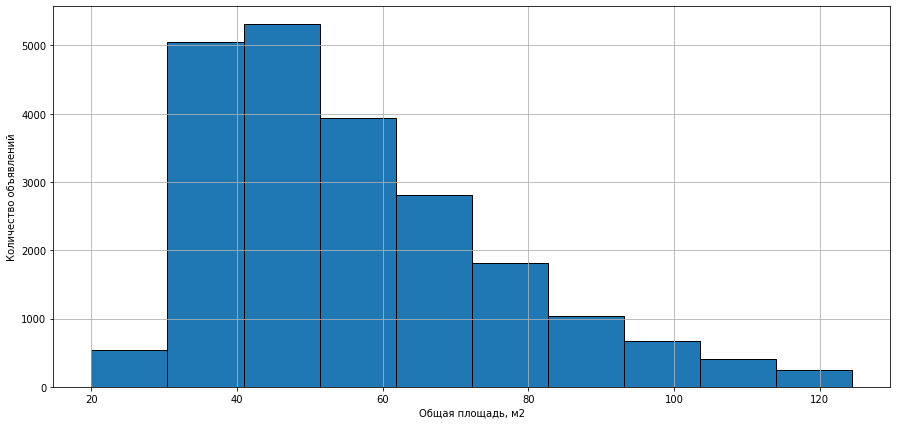

In [83]:
#Смотрим график по данным до 98% квантиля:
df[df["total_area"] < df['total_area'].quantile(0.98)]["total_area"].hist(edgecolor="black", figsize=(15,7))
plt.xlabel("Общая площадь, м2");
plt.ylabel("Количество объявлений");

In [84]:
#Убираем 2% максимальных значений и проверяем : 
df = df[df["total_area"] < df['total_area'].quantile(0.98)]
df['total_area'].describe()

count    21796.000000
mean        55.692254
std         19.947079
min         20.000000
25%         40.400000
50%         51.400000
75%         67.000000
max        124.500000
Name: total_area, dtype: float64

Теперь посмотрим минимальные значения общей плоащди. Согласно гуглу (сайт https://www.pereplanirovkamos.ru/normativnaya-ploshchad-pomeshcheniy-kvartiry.html?utm_referrer=https%3A%2F%2Fwww.google.com%2F):  Минимальная площадь 1 комнатной квартиры = 28 м2. Следовательно, будем убирать все объявления с меньшей площадью.

In [85]:
#Оставляем все значения больше 28.0 м2. Проверяем данные.
df = df[df['total_area'] >= 28.0]
df['total_area'].describe()

count    21755.000000
mean        55.749405
std         19.922186
min         28.000000
25%         40.500000
50%         51.500000
75%         67.000000
max        124.500000
Name: total_area, dtype: float64

<div class="alert alert-info">
    По столбцу "общая площадь" мы посмотрели и убрали выдающиеся максимальные значения (которые больше относятся к элитной недвижимости, и могут исказить дальнейший анализ). А также убрали минимальные площади до 28 м2 (такие квартиры называются малосемейками или возможно продавали комнаты).
    </div>

##### Аномальные значния floor

In [86]:
#Смотрим описание столбца "этаж"
df['floor'].describe()

count    21755.000000
mean         5.871570
std          4.857684
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Минимальный этаж - 1. Максимальный - 33. Все реально. Мода в 4 этажа.

In [87]:
#Смотрим количество уникальных значений:
df['floor'].value_counts()

2     3092
3     2807
1     2702
4     2551
5     2430
6     1186
7     1116
8     1008
9      994
10     632
12     487
11     476
13     345
15     316
14     310
16     286
17     196
18     157
19     124
21     110
22     104
20      99
23      93
24      57
25      41
26      21
27       9
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

Большинство квартир находятся в пределах 5ти этажей. Есть штучные квариты свыше 28 этажа.  

<div class="alert alert-info">
В данных по этому столбцу никаких аномальных значений не было выявлено. В выборке есть высотные этажи, но не думаю, что этот фактор будет влиять на дальнейший анализ.
    </div>

##### Аномальные значения first_day_exposition

In [88]:
#Смотрим тип столбца
df['first_day_exposition'].dtypes

dtype('O')

Тип строковый "object" не подходит для работы с датами. Необходимо изменить тип на значения даты и времени

In [89]:
#Меняем тип на значения даты и времени. Проверяем .
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"])
df.dtypes['first_day_exposition']

dtype('<M8[ns]')

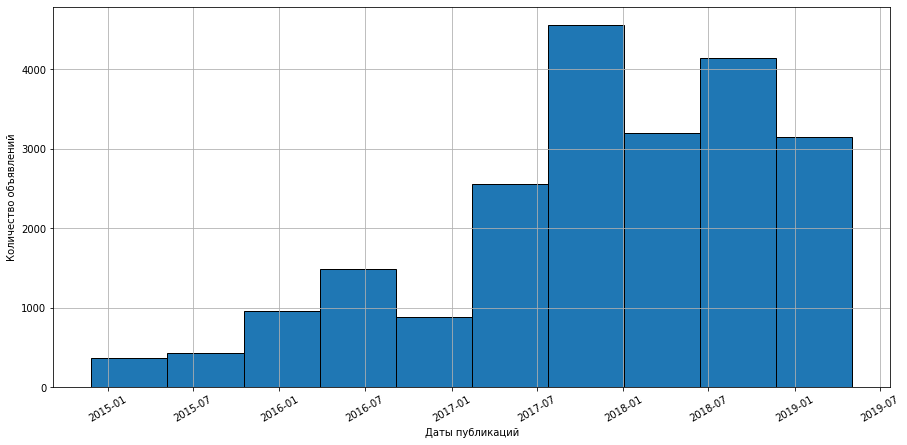

In [90]:
#Строим график по столбцу
df['first_day_exposition'].hist(grid=True, edgecolor="black", figsize=(15,7));
plt.xticks(rotation=30);
plt.xlabel("Даты публикаций");
plt.ylabel("Количество объявлений");

Видим, что есть объявления немного ранее января 2015 года. Основная масса объявлений приходится на период с июля 2017 г по январь 2019 г. 

In [91]:
#Сортируем таблицу по дате объявления:
df.sort_values (by = 'first_day_exposition').head(10)                                                 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
20635,10,4600000.0,44.00,2014-11-27,1,2.75,22,20.00,19,False,False,False,10.00,1,Санкт-Петербург,15268.0,13377.0,0.0,NaN,1.0,636.0,1002.0,Высотные дома
617,1,12036000.0,100.00,2014-11-27,3,2.70,16,52.00,3,False,False,False,11.00,1,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,606.0,Дома повышенной этажности
3486,2,14500000.0,97.40,2014-11-27,2,3.00,8,36.30,2,False,False,False,31.70,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1078.0,Многоэтажные дома
15427,2,3550000.0,34.00,2014-11-27,1,2.55,9,18.90,7,False,False,False,6.00,1,Санкт-Петербург,13430.0,14405.0,1.0,500.0,1.0,504.0,1149.0,Многоэтажные дома
696,1,3364930.0,34.69,2014-11-27,1,2.64,25,23.43,25,False,False,False,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,Высотные дома
3291,8,8200000.0,52.50,2014-11-27,1,2.60,8,21.50,2,False,False,False,15.10,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,Многоэтажные дома
16159,5,14538350.0,80.55,2014-11-27,2,2.80,12,35.00,10,False,False,False,16.45,2,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1076.0,Дома повышенной этажности
10364,7,14900000.0,120.00,2014-11-27,2,2.60,5,53.00,4,False,False,False,14.00,0,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,1391.0,Пятиэтажки
21867,19,26360000.0,95.00,2014-11-27,3,2.60,9,59.80,8,False,False,False,12.20,1,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,1107.0,Многоэтажные дома
2831,9,5990000.0,64.40,2014-11-27,2,3.12,4,36.20,1,False,False,False,14.60,0,Санкт-Петербург,24668.0,5236.0,1.0,366.0,0.0,NaN,1069.0,Пятиэтажки


<div class="alert alert-info">
    По столбцу "first_day_exposition" изменили тип данных со строкового на значения даты и время. Посмотрели, что есть объявления с конца ноября 2014 года. Основная часть объявлений приходится на период с июля 2017 г по январь 2019 г.
</div>

##### Аномальные значения "is_studio", "is_open_plan"

In [92]:
#Смотрим на значения в "is_studio":
df['is_studio'].value_counts()

False    21751
True         4
Name: is_studio, dtype: int64

In [93]:
#Смотрим на те значения, где True:
df[df['is_studio']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
4180,4,4500000.0,34.0,2016-04-25,1,2.80,10,21.0,10,False,True,False,5.780,2,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0,Дома повышенной этажности
8683,10,3500000.0,32.5,2016-05-05,1,3.00,23,29.9,11,False,True,False,5.525,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0,Высотные дома
12935,10,2200000.0,31.0,2016-05-15,1,2.50,8,22.3,5,False,True,False,5.270,1,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Многоэтажные дома
15142,2,2700000.0,30.0,2016-05-10,1,2.75,21,26.0,6,False,True,False,5.100,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Высотные дома


In [94]:
#Смотрим на значения 'is_open_plan'
df['is_open_plan'].value_counts()

False    21748
True         7
Name: is_open_plan, dtype: int64

In [95]:
#Смотрим на те значения, где True:
df[df['is_open_plan']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total
1379,3,6000000.0,44.2,2015-11-10,1,2.75,25,17.4,23,False,False,True,7.514,1,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0,Высотные дома
5668,9,3550000.0,36.7,2016-04-25,1,2.75,16,17.8,2,False,False,True,6.239,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61.0,Дома повышенной этажности
8861,13,5500000.0,64.5,2015-11-13,3,3.00,5,48.0,2,False,False,True,10.965,0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229.0,Пятиэтажки
9063,6,3800000.0,39.0,2016-05-19,1,2.70,17,30.0,1,False,False,True,6.630,0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45.0,Дома повышенной этажности
12760,0,3350000.0,51.0,2015-01-22,2,2.50,12,30.0,10,False,False,True,8.670,2,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521.0,Дома повышенной этажности
14017,13,3990000.0,59.0,2016-03-29,3,2.50,9,37.6,3,False,False,True,10.030,1,Колпино,27820.0,33606.0,0.0,NaN,1.0,705.0,81.0,Многоэтажные дома
19796,1,12000000.0,97.2,2016-04-05,4,3.35,5,71.3,2,False,False,True,16.524,0,Санкт-Петербург,24559.0,4811.0,0.0,NaN,0.0,NaN,89.0,Пятиэтажки


<div class="alert alert-info">
Доля квартир с открытой планировкой и студии очень мала в общей выборке, это штучные квартиры. Аномальных значений не видно. 
    </div>

### Считаем и добавляем в таблицу новые столбцы

#### Добавляем в таблицу: цена одного квадратного метра (в рублях)

In [96]:
#Вычисляем цену одного квадратного метра (в рублях)
df["meter_price"] = (df["last_price"] / df["total_area"]).round(1)

In [97]:
#Смотрим таблицу:
df[['meter_price', 'last_price', 'total_area', 'rooms', 'locality_name', 'city_centers_nearest']].head(10)

,meter_price,last_price,total_area,rooms,locality_name,city_centers_nearest
0,120370.4,13000000.0,108.00,3,Санкт-Петербург,16028.0
1,82920.8,3350000.0,40.40,1,поселок Шушары,18603.0
2,92785.7,5196000.0,56.00,2,Санкт-Петербург,13933.0
4,100000.0,10000000.0,100.00,2,Санкт-Петербург,8098.0
5,95065.8,2890000.0,30.40,1,поселок Янино-1,NaN
7,110544.7,7915000.0,71.60,2,Санкт-Петербург,11634.0
8,87454.8,2900000.0,33.16,1,поселок Мурино,NaN
9,88524.6,5400000.0,61.00,3,Санкт-Петербург,15008.0
10,127525.3,5050000.0,39.60,1,Санкт-Петербург,13878.0
11,75000.0,3300000.0,44.00,2,Ломоносов,51677.0


##### Добавляем в таблицу: день, месяц, год публикации объявления 

In [98]:
#Добавляем в таблицу: день публикации объявления (0 - понедельник, 1 - вторник, 2 - среда, 3 - четверг, 4 - пятница, 
#5 - суббота, 6 - воскресение)
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek

In [99]:
#Добавляем в таблицу: месяц и год публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [100]:
#Смотрим столбцы в таблице:
df[['first_day_exposition','day_exposition', 'month_exposition', 'year_exposition']].tail(5)

,first_day_exposition,day_exposition,month_exposition,year_exposition
23692,2017-07-07,4,7,2017
23693,2016-08-05,4,8,2016
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


##### Добавляем в таблицу: тип этажа квартиры 

In [101]:
#Добавляем в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
#Пишем функцию, которая будет определять категорию этажа
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

In [102]:
#Записываем в новый столбец "floor_category" значения с помощью функции. Проверяем:
df['floor_category'] = df.apply(floor_category, axis=1) 
print(df[['floor', 'floors_total', 'floor_category']].head(10))
df['floor_category'].value_counts()

    floor  floors_total floor_category
0       8            16         Другой
1       1            11         Первый
2       4             5         Другой
4      13            14         Другой
5       5            12         Другой
7      22            24         Другой
8      26            27         Другой
9       7             9         Другой
10      3            12         Другой
11      4             5         Другой


Другой       15973
Последний     3080
Первый        2702
Name: floor_category, dtype: int64

##### Добавляем в таблицу: расстояние в км до центра города

In [103]:
#Добавляем в таблицу: расстояние в км до центра города
df['km_city_centers'] = (df['city_centers_nearest']/1000).round()
df[['city_centers_nearest', 'km_city_centers', 'locality_name']].head(10)

,city_centers_nearest,km_city_centers,locality_name
0,16028.0,16.0,Санкт-Петербург
1,18603.0,19.0,поселок Шушары
2,13933.0,14.0,Санкт-Петербург
4,8098.0,8.0,Санкт-Петербург
5,NaN,NaN,поселок Янино-1
7,11634.0,12.0,Санкт-Петербург
8,NaN,NaN,поселок Мурино
9,15008.0,15.0,Санкт-Петербург
10,13878.0,14.0,Санкт-Петербург
11,51677.0,52.0,Ломоносов


<div class="alert alert-info">
    Были рассчитаны и добавлены в таблицу новые значения: цена одного квадратного метра, день, месяц, год публикации объявления, тип этажа квартиры («первый», «последний», «другой»), расстояние в км до центра города.
    </div>

### Исследовательский анализ данных

Ранее была проведена предобработка данных. Мы заполнили пропуски, там где это было возможно. Обработали аномальные значения. Убрали выдающиеся максимальные и минимальные данные. Добавили новые значения в таблицу. Теперь переходим к анализу:

##### Пункт 1

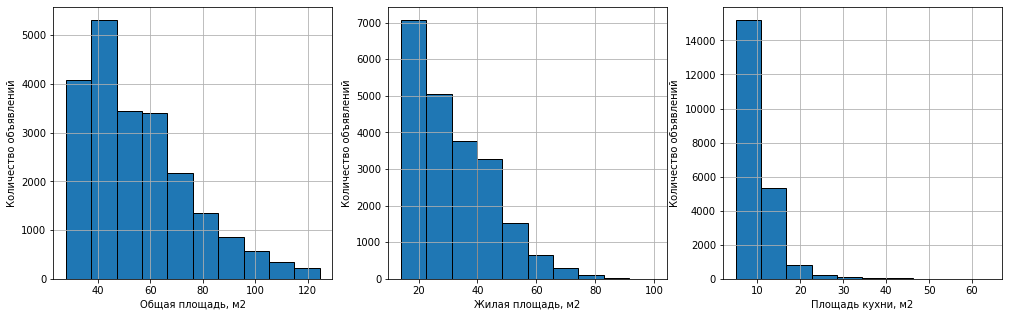

In [104]:
plt.figure (figsize = (17,5))
#Строим гистограмму по столбцу "общая площадь"
plt.subplot(131)
df['total_area'].hist(edgecolor='black');
plt.xlabel("Общая площадь, м2");
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "жилая площадь"
plt.subplot(132)
df['living_area'].hist(edgecolor='black');
plt.xlabel("Жилая площадь, м2");
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "площадь кухни"
plt.subplot(133)
df['kitchen_area'].hist(edgecolor='black');
plt.xlabel("Площадь кухни, м2");
plt.ylabel("Количество объявлений");

Гистограмма "Общая площадь" - видим, что бОльшая часть квартир имеет общую площадь в пределах 28-60 м2. Выделяющихся данных не наблюдается. Хороший график. <br>

Гистограмма "Жилая площадь" - больше всего квартир имеют жилую площадь около 20 м2. На втором месте - квартиры с площадью от 30м2 до 38м2. Есть немного квартир с площадью более 60м2<br>

Гистограмма "Площадь кухни" - подавляющая часть квартир имеют площадь кухни до 10м2. Есть часть квартир с площадью до 20 м2. И небольшое количество обладателей просторных кухонь с площадью от 20м2 до 40м2.  

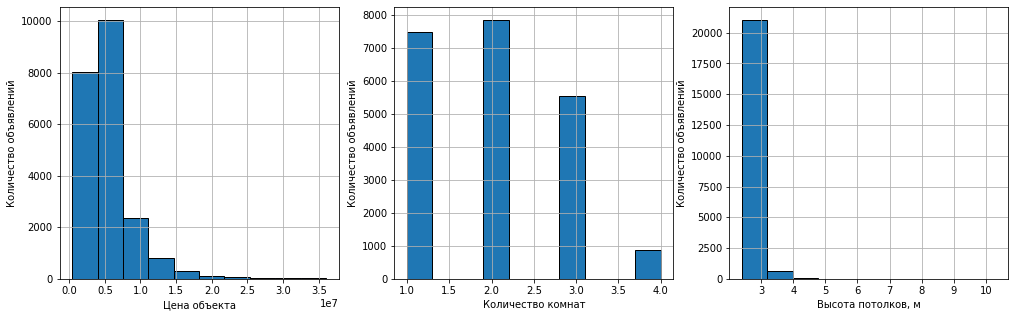

In [105]:
plt.figure (figsize = (17,5))

#Строим гистограмму по столбцу "цена объекта"
plt.subplot(131)
df['last_price'].hist(edgecolor='black');
plt.xlabel('Цена объекта');
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "количество комнат"
plt.subplot(132)
df['rooms'].hist(edgecolor='black')
plt.xlabel("Количество комнат");
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "высота потолков"
plt.subplot(133)
df['ceiling_height'].hist(edgecolor='black')
plt.xlabel("Высота потолков, м");
plt.ylabel("Количество объявлений");

Гистограмма "Цена объекта" - здесь мы видим, что основная часть квартир имеет цену до 5-7млн. рублей. Есть часть недвижимости с ценой свыше 10 000 000 рублей. <br>

Гистограмма "Количество комнат" - двухкомнтаных квартир больше всего в продаже, почти впритык идут однокомнатные квартиры. Немного меньше трехкомнатных, и совсем немного четырехкомнатных квартир. Квартиры с выше 4 комнат были убраны из анализа.  <br>

Гистограмма "Высота потолков" - в основном продаются квартиры с высотой потолков до 3 - 3,2 метров. Совсем немного вариантов с высотой потолков более 3,3 метров.

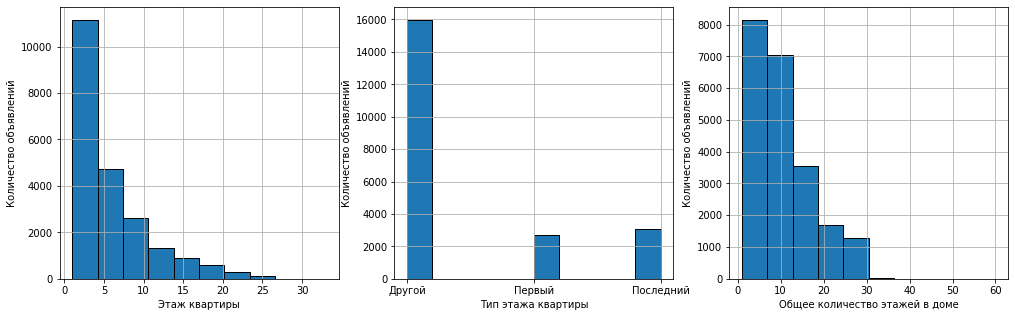

In [106]:
plt.figure (figsize = (17,5))

#Строим гистограмму по столбцу "этаж квартиры"
plt.subplot(131)
df['floor'].hist(edgecolor='black');
plt.xlabel("Этаж квартиры");
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "тип этажа квартиры" («первый», «последний», «другой»);
plt.subplot(132)
df['floor_category'].hist(edgecolor='black')
plt.xlabel("Тип этажа квартиры");
plt.ylabel("Количество объявлений");

#Строим гистограмму по столбцу "общее количество этажей в доме"
plt.subplot(133)
df['floors_total'].hist(edgecolor='black');
plt.xlabel("Общее количество этажей в доме");
plt.ylabel("Количество объявлений");

Гистограмма "Этаж квартиры" - больше всего квартир расположено на первых четырех этажах. Есть варианты с этажностью выше 10го этажа, а также в высотных домах - свыше 20го этажа.<br>

Гистограмма "Тип этажа квартиры" - в основном квартиры расположены в категории "другой" этаж, квартир, находящихся на посленем этаже немного больше, чем на первом.<br>

Гистограмма "Общее количество этажей в доме" - больше всего квартир находятся в малоэтажных и пятиэтажных домах. Следом идут многоэтажные и высотные дома. Небольшая часть домов с повышенной этажностью. 

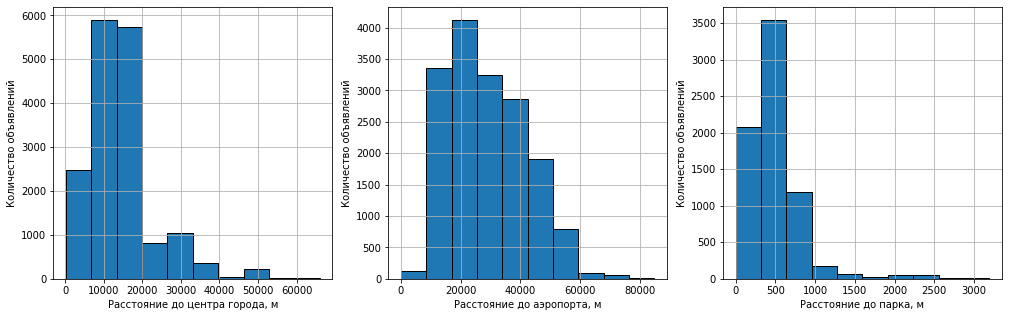

In [107]:
plt.figure (figsize = (17,5))

#Строим гистограмму по столбцу "расстояние до центра города в метрах"
plt.subplot(131)
df['city_centers_nearest'].hist(edgecolor='black');
plt.xlabel("Расстояние до центра города, м");
plt.ylabel("Количество объявлений");

#расстояние до ближайшего аэропорта;
plt.subplot(132)
df['airports_nearest'].hist(edgecolor="black");
plt.xlabel("Расстояние до аэропорта, м");
plt.ylabel("Количество объявлений");

#расстояние до ближайшего парка;
plt.subplot(133)
df['parks_nearest'].hist(edgecolor="black");
plt.xlabel("Расстояние до парка, м");
plt.ylabel("Количество объявлений");

Гистограмма "Расстояние до центра города" - Большинство квартир находятся на расстоянии от ~7 до 20 км от центра города. Есть квартиры в окрестностях в пределах 30 км, 50 км, совсем немного в 60 км.<br>

Гистограмма "Расстояние до аэропорта" - Есть немного квартир, которые расположены совсем рядом с аэропортом Пулково. Однако же основная часть квартир находятся на расстоянии от 10км до 40 км от аэропорта. <br>

Гистограмма "Растояние до парка" - Из тех объявлений, где указан данный параметр, большинство квартир находятся совсем рядом с парком в пределах 500-1000м. 

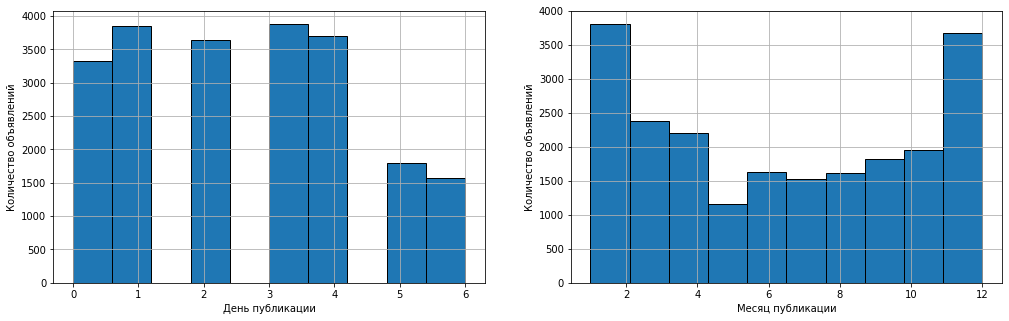

In [108]:
plt.figure (figsize = (17,5))

#день публикации объявления
plt.subplot(121)
df['day_exposition'].hist(edgecolor="black");
plt.xlabel("День публикации");
plt.ylabel("Количество объявлений");

#Месяц публикации объявления
plt.subplot(122)
df['month_exposition'].hist(edgecolor="black");
plt.xlabel("Месяц публикации");
plt.ylabel("Количество объявлений");

Гистограмма "День публикации" - В основном объявления публикуются в будние дни (в выходные количество в разы меньше). Во вторник и четверг чуть больше чем в дргуие дни.<br>

Гистограмма "Месяц публикации" - Декабрь и январь лидируют по количествам объявлений в течении года. Самый "неурожайный" месяц - май. Весной публикуют объявлений немного чаще, чем осенью. Летом меньше всего. 

<div class="alert alert-info">
     Выше мы детально просмотрели основные параметры по квартирам. Чаще всего встречаются объявления: <br>
    
- общая площадь = 40 м2; <br>
- жилая площадь = 20 м2; <br>
- площадь кухни = 5-10 м2; <br>
- цена объекта = 5-7 млн. рублей <br>
- количество комнат = 2; <br>
- высота потолков - до 3м; <br>
- этаж квартиры - первые четыре этажа; <br>
- тип этажа квартиры - «другой»; <br>
- общее количество этажей в доме - 1-5 этажей; <br>
- расстояние до центра города в метрах - от 7 до 20 км.; <br>
- расстояние до ближайшего аэропорта - 10 - 40 км.; <br>
- расстояние до ближайшего парка - 500-1000 м.; <br>
- день публикации объявления - будние дни; <br>
- месяц публикации объявления - декабрь, январь; <br>
     
</div>

##### Пункт 2: 

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление. Построим гистограмму.<br>
Посчитаем среднее и медиану.<br>
Определим сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

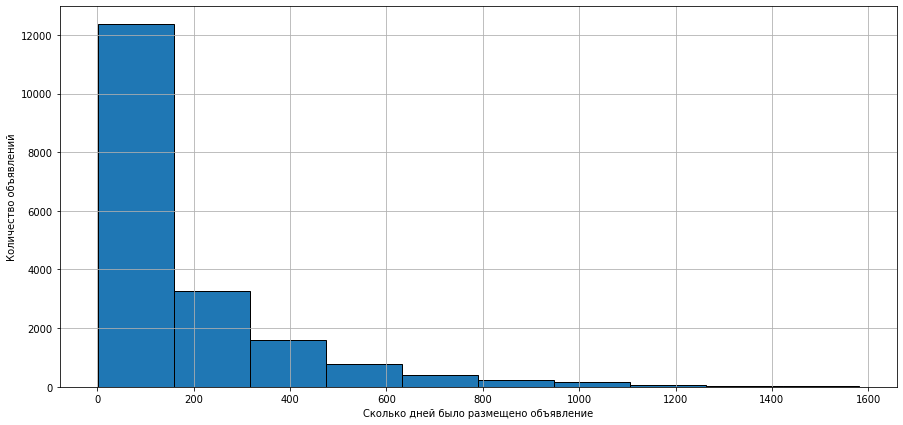

In [109]:
#Смотрим гистограмму по столбцу "сколько дней было размещено объявление"
df['days_exposition'].hist(edgecolor="black", figsize = (15,7));
plt.xlabel("Cколько дней было размещено объявление");
plt.ylabel("Количество объявлений");

In [110]:
#Выводим описание данных:
df['days_exposition'].describe()

count    18934.000000
mean       177.347365
std        215.797955
min          1.000000
25%         44.250000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [111]:
#Считаем долю квартир, которые продовались больше года:
round (len(df[df['days_exposition']>365])/len(df['days_exposition']), 2)

0.13

<div class="alert alert-info">
Посмотрим как быстро продавались квартиры. Медиана данного параметра = 93 дня. Среднее значение = 177 дней. Самая быстрая продажа - за 1 день. Самая долгая продажа = 1580 дней (свыше 4 лет). <br>
По графику мы видим, что примерно в срок за 180 дней (полгода) подавляющее большинство квартир было продано. <br>
Доля квартир, продаваемых свыше года, составляет 13% от общего числа проданных.<br>
Отвечая на вопрос какие продажи можно считать быстрыми, (гугл говорит, что это продажи в течение 1-2х месяцев), в нашем случае, возьмем данные по первому квартилю - 44 дня (почти 1,5 месяца). К необычно долгим продажам можно отнести срок, согласно третьему квартилю - 226 дня (свыше 7 месяцев). 
    </div>

##### Пункт 3: 
 
Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта? Построим графики, которые покажут зависимость цены от указанных ниже параметров. <br>
  - общей площади;<br>
  - жилой площади;<br>
  - площади кухни;<br>
  - количество комнат;<br>
  - типа этажа, на котором расположена квартира (первый, последний, другой);<br>
  - даты размещения (день недели, месяц, год);

In [112]:
#Построим таблицу корреляции по указаным параметрам:
(
   df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category', 
        'day_exposition','month_exposition', 'year_exposition' ]].corr()
    .style.background_gradient(axis=None, low=0.25, high=1.0)
)

,last_price,total_area,living_area,kitchen_area,rooms,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.719628,0.584857,0.568308,0.399888,-0.019683,-0.000683,-0.015827
total_area,0.719628,1.000000,0.911545,0.545496,0.775127,-0.018057,0.008165,-0.067951
living_area,0.584857,0.911545,1.000000,0.268592,0.871335,-0.013106,0.001317,-0.054154
kitchen_area,0.568308,0.545496,0.268592,1.000000,0.141517,-0.017599,0.011277,-0.041046
rooms,0.399888,0.775127,0.871335,0.141517,1.000000,-0.005713,-0.000674,-0.036254
day_exposition,-0.019683,-0.018057,-0.013106,-0.017599,-0.005713,1.000000,0.009897,-0.001501
month_exposition,-0.000683,0.008165,0.001317,0.011277,-0.000674,0.009897,1.000000,-0.271526
year_exposition,-0.015827,-0.067951,-0.054154,-0.041046,-0.036254,-0.001501,-0.271526,1.000000


<AxesSubplot:>

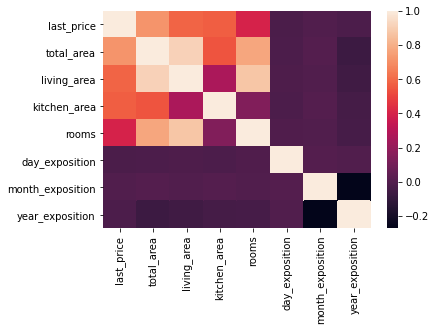

In [113]:
#Также можно посмотреть данные через тепловую карту:
sns.heatmap(df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category', 
        'day_exposition','month_exposition', 'year_exposition' ]].corr())

Согласно таблице корреляции мы наблюдаем саму сильную связь у параметров "общая площадь" и "цена" = 0,72. Параметры "жилая площадь" и "площадь кухни" примерно одинаково меньше влияют на стоимость квартиры. "Количество комнат" имеет наименьшую положительную связь на цену. День, месяц, год публикации на графике закрашены темно-фиолетовым цветом, связи с ценой квартиры не выявлено.

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='Общая площадь', ylabel='Цена'>

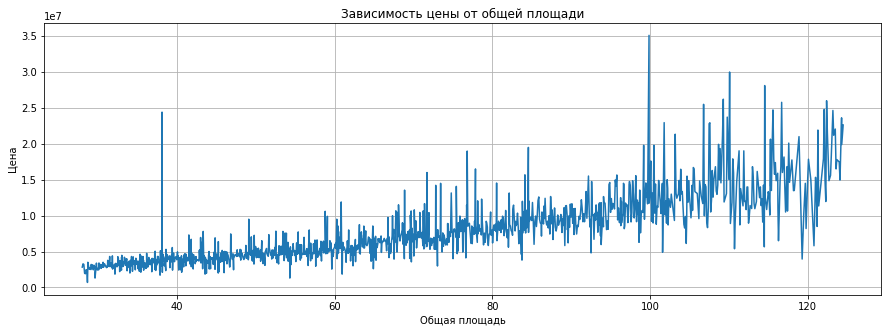

In [114]:
#Строим график зависимость цены от общей площади
(
df.groupby('total_area')['last_price'].mean()
    .plot(figsize=(15,5), grid=True, title = 'Зависимость цены от общей площади', xlabel='Общая площадь', ylabel='Цена')

)

На графике стал заметен выброс - аномальная высокая цена в районе 40м2. Постараемся найти это значение и разобраться с ним.

In [115]:
#Просматривая данные в глаза бросилась следующая строчка (номер 21238):
df.loc[df['last_price'] == 24412900.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total,meter_price,day_exposition,month_exposition,year_exposition,floor_category,km_city_centers
21238,1,24412900.0,38.12,2018-06-27,1,2.7,10,16.83,4,False,False,False,10.7,1,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Дома повышенной этажности,640422.4,2,6,2018,Другой,NaN


In [116]:
#Смотрим квартиры по г. Всеволожску, сортируем по цене по убыванию.
q = df.loc[df['locality_name'] == 'Всеволожск']
q.sort_values(by='last_price', ascending=False)
#Видим, что скорей всего это было опечаткой, и квартира стоит не 24 млн рублей, а 2,4 млн. рублей - как и другие однушки 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,categorize_floors_total,meter_price,day_exposition,month_exposition,year_exposition,floor_category,km_city_centers
21238,1,24412900.0,38.12,2018-06-27,1,2.70,10,16.830,4,False,False,False,10.7000,1,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Дома повышенной этажности,640422.4,2,6,2018,Другой,NaN
11498,6,10890000.0,80.00,2018-06-11,2,2.75,3,40.000,2,False,False,False,12.0000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,308.0,Малоэтажные дома,136125.0,0,6,2018,Другой,NaN
12640,20,10300000.0,75.50,2019-03-21,2,3.00,2,42.500,2,False,False,False,13.2000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Малоэтажные дома,136423.8,3,3,2019,Последний,NaN
21589,17,10000000.0,75.00,2018-07-13,2,3.00,3,46.000,2,False,False,False,16.0000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,74.0,Малоэтажные дома,133333.3,4,7,2018,Другой,NaN
23032,12,8999999.0,100.00,2017-10-23,3,2.60,18,66.000,5,False,False,False,25.0000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,59.0,Дома повышенной этажности,90000.0,0,10,2017,Другой,NaN
11148,12,8000000.0,100.00,2018-07-09,4,2.70,7,53.900,1,False,False,False,28.1000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Многоэтажные дома,80000.0,0,7,2018,Первый,NaN
16925,7,7890000.0,107.00,2019-01-05,4,2.60,5,59.920,3,False,False,False,18.1900,5,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Пятиэтажки,73738.3,5,1,2019,Другой,NaN
8728,14,7800000.0,121.00,2017-06-06,3,2.90,4,45.000,1,False,False,False,25.0000,5,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,36.0,Пятиэтажки,64462.8,1,6,2017,Первый,NaN
13844,11,7560000.0,100.20,2019-03-31,3,2.80,5,58.100,3,False,False,False,14.3000,5,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Пятиэтажки,75449.1,6,3,2019,Другой,NaN
9279,20,6800000.0,90.00,2017-09-30,3,2.75,23,50.500,14,False,False,False,13.0000,2,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,162.0,Высотные дома,75555.6,5,9,2017,Другой,NaN


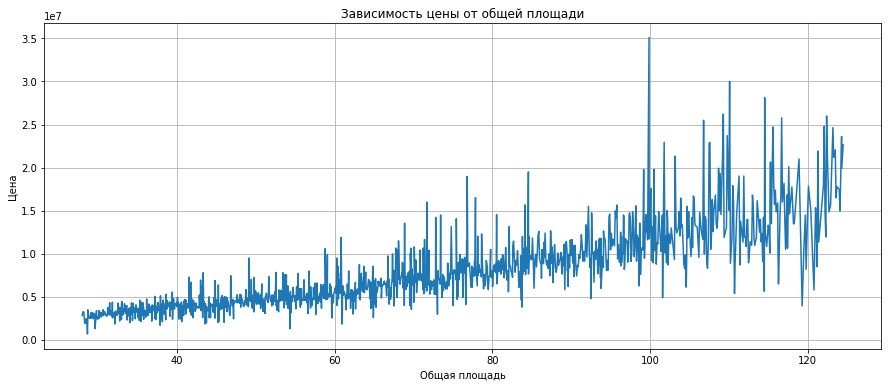

In [120]:
#Скоректируем данные, разделив цену на 10
df.loc[df['last_price'] == 24412900.0, 'last_price'] = df['last_price']/10

#Проверяем на графике, ушел ли выброс.
(
df.groupby('total_area')['last_price'].mean()
    .plot(figsize=(15,6), grid=True, title = 'Зависимость цены от общей площади', xlabel='Общая площадь', ylabel='Цена')
);

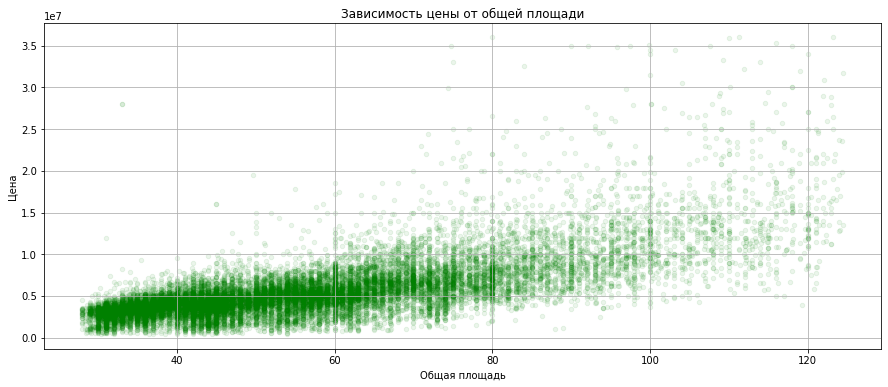

In [119]:
#Построим точечный график:
df.plot (
    x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.08, color='green', figsize=(15,6),
    title = 'Зависимость цены от общей площади').set(
    xlabel='Общая площадь', ylabel='Цена'
);

In [121]:
#Смотрим коэфициент корреляции общей площади к последней цене:
corr_area = df['last_price'].corr(df['total_area'])
print('Коэффициент корреляции:', '{:.2f}'.format(corr_area))

Коэффициент корреляции: 0.72


<div class="alert alert-info">
    Построив график по сводной таблице средняя цена по общей площади, мы обнаружили выброс (квартира с площадью меньше 40м2 стоит почти 25млн. рублей). Обработав этот выброс, мы видим на графике прямую зависимость: чем больше площадь - тем больше цена.<br>
Это подтверждается высоким коэфициентом корреляции = 0,72, это означает, что между расматриваемыми параметрами есть прямая зависимость. <br>
    
Построив диаграмму рассеяния, видим, что в ячейках "Общая площадь" 0-40 м2 и "Цена" 0-5 млн руб, и "Общая площадь" 40-60м2 - "Цена" примерно до 7млн. рублей  - цвет графика наиболее плотный, это значит здесь находится наибольшая концетрация квартир. 
    </div>

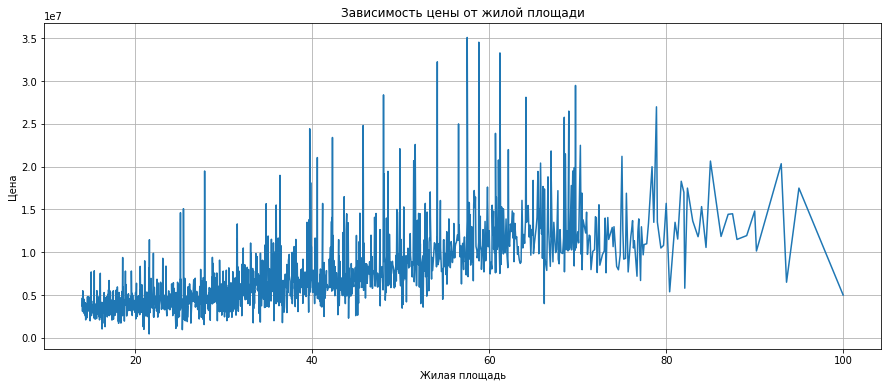

In [122]:
# Зависимость цены от жилой площади
(
    df.groupby('living_area')['last_price'].mean()
    .plot(figsize=(15,6), grid=True, title = 'Зависимость цены от жилой площади', xlabel='Жилая площадь', ylabel='Цена')
);

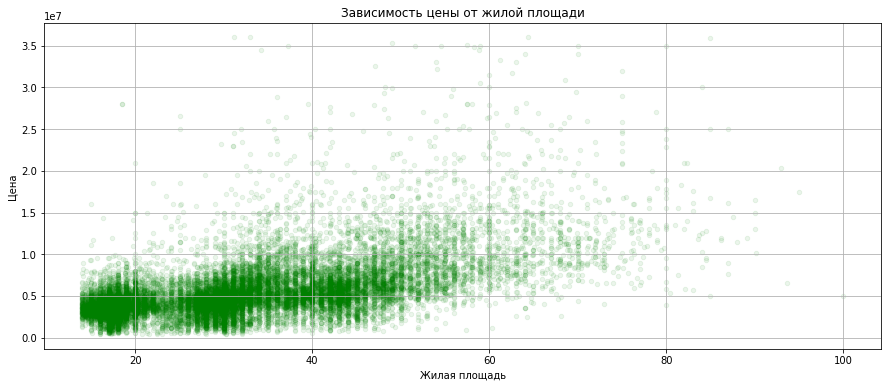

In [123]:
#Построим точечный график:
df.plot (
    x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.08, color='green', figsize=(15,6),
    title = 'Зависимость цены от жилой площади').set(
    xlabel='Жилая площадь', ylabel='Цена'
);

In [124]:
#Смотрим коэфициент корреляции жилой площади к последней цене:
corr_area = df['last_price'].corr(df['living_area'])
print('Коэффициент корреляции:', '{:.2f}'.format(corr_area))

Коэффициент корреляции: 0.59


<div class="alert alert-info">
На графике мы видим, что при увеличении жилой площади цена тоже увеличивается, только не так сильно как на предыдущем параметре "общая площадь". Это подтверждает и коэффициент корреляции = 0,59. Это значит, что есть средняя связь, прямая зависимость между параметрами "жилая площадь" и "цена".<br>
Построив диаграмму рассеяния, видим наиболее концетрированные по цвету участки в диапозоне "Жилая площадь" до 20м2, "Цена" до 5млн. рублей и "Жилая площадь" в районе 30м2,"Цена" 3-8 млн.рублей. Это означает, что в данных категориях встречаются больше всего квартир на продажу. 
    </div>

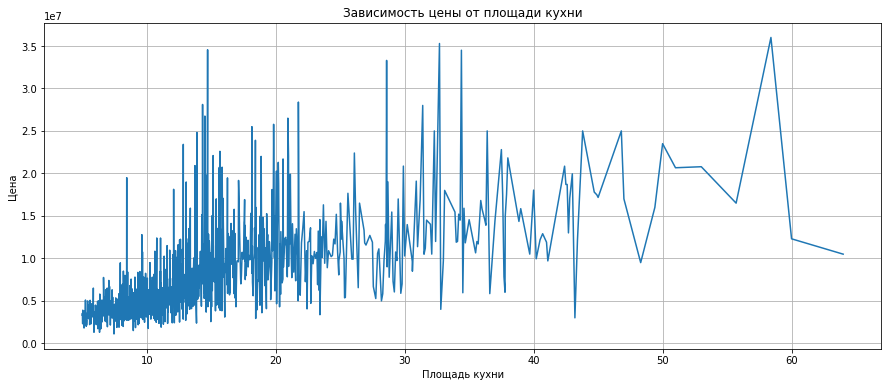

In [125]:
# Зависимость цены от площади кухни
(
    df.groupby('kitchen_area')['last_price'].mean()
    .plot(figsize=(15,6), grid=True, title = 'Зависимость цены от площади кухни', xlabel='Площадь кухни', ylabel='Цена')
);

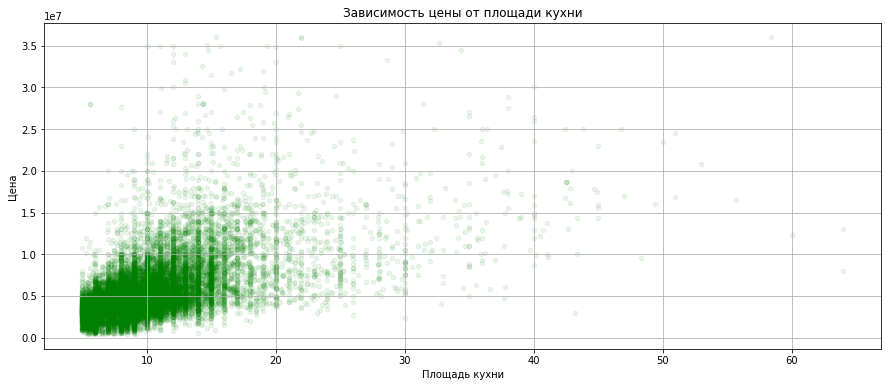

In [126]:
#Строим точечный график:
df.plot (
    x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.08, color='green', figsize=(15,6),
    title = 'Зависимость цены от площади кухни').set(
    xlabel='Площадь кухни', ylabel='Цена'
);

In [127]:
#Смотрим коэфициент корреляции площади кухни к последней цене:
corr_area = df['last_price'].corr(df['kitchen_area'])
print('Коэффициент корреляции:', '{:.2f}'.format(corr_area))

Коэффициент корреляции: 0.57


<div class="alert alert-info">
    На первом графике мы видим, что цена растет при увеличении площади кухни, но при этом сильно колеблется. По ощущениям, связь еще меньше, чем при жилой площади. Что подтверждается коэффициентом корреляции = 0,57 (против 0,59 с жилой площадью). Но при этом, данный коэфициент говорит нам, что между рассматриваемыми параметрами связь средняя, зависимость прямая.
<br>
Построив диаграмму рассеяния, видим наиболее концетрированные по цвету участок в диапозоне "Площадь кухни" 5-12 м2, "Цена" от 1 млн. рублей до 7,5 млн. рублей. Это означает, что с этими параметрами встречается больше всего квартир на продажу. 
</div>

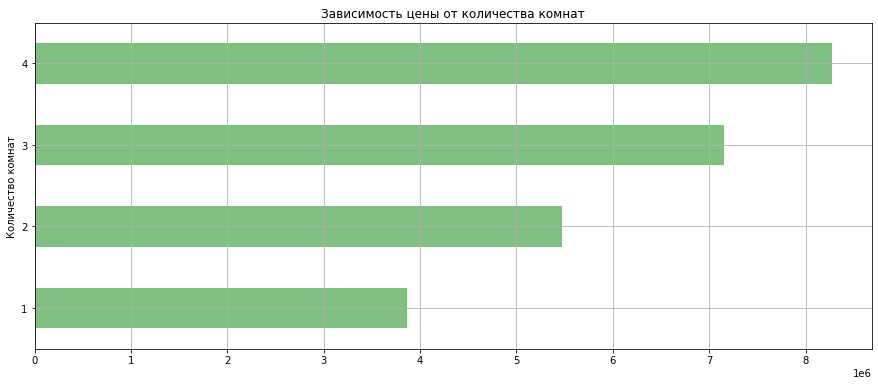

In [128]:
# Зависимость цены от количество комнат
(
    df.groupby('rooms')['last_price'].mean()
    .plot(kind='barh', grid=True, figsize=(15,6), title = 'Зависимость цены от количества комнат', alpha=0.5, color='green',
          xlabel='Количество комнат', ylabel='Средняя цена')
);

In [129]:
#Смотрим коэфициент корреляции количества комнат к последней цене:
corr_area = df['last_price'].corr(df['rooms'])
print('Коэффициент корреляции:', '{:.2f}'.format(corr_area))

Коэффициент корреляции: 0.40


<div class="alert alert-info">
    На графике мы видим прямую зависимость, чем больше комнат, тем выше средняя цена квартиры. (что довольно логично, больше комнат - больше площадь - выше цена).<br>
Однако, коэффициент корреляции = 0,4. Показывает слабую связь между рассматриваемыми параметрами, но прямую зависимость. 
Диаграмма рассеяния в данном случае малоинформативна, ее рассматривать не будем.
    </div>

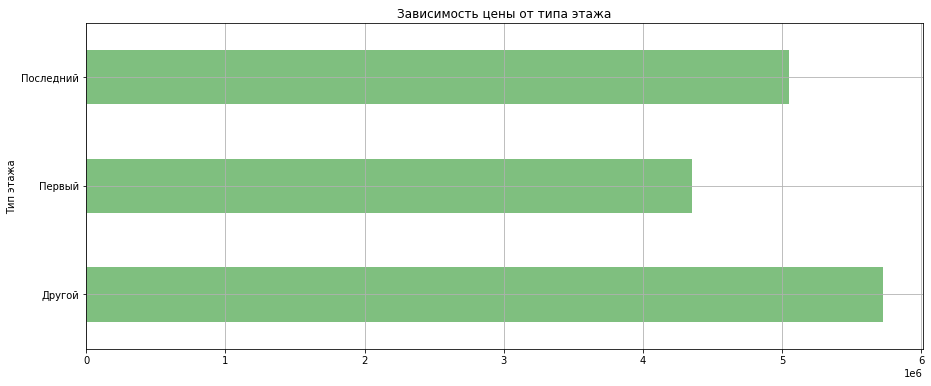

In [130]:
# Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой);
(
    df.groupby('floor_category')['last_price'].mean()
    .plot(kind='barh', grid=True, figsize=(15,6), title = 'Зависимость цены от типа этажа', alpha=0.5, color='green',
          xlabel='Тип этажа', ylabel='Средняя цена')
);

<div class="alert alert-info">
    Коэфициент корреляции в данном случае рассчитать не получится, потому что тип данных является строковым значением.
<br>
На графике видим, что самая высокая стоимость у квартир, которые расположены на "Другом" этаже, т.е. выше первого и ниже последнего этажа. Квартиры на первом этаже продаются дешевле, чем на последнем и на других этажах. Разница в средней стоимости между первым и другим этажом составляет немного больше 1 млн. рублей, что довольно много. Однако же, квартиры на последнем этаже тоже ниже других этажей. 
<br>
В итоге, можно сказать, что между рассматриваемыми параметрами есть прямая зависимость, т.е. средняя цена квартиры напрямую зависит от типа этажа на котором она расположена.
    </div>

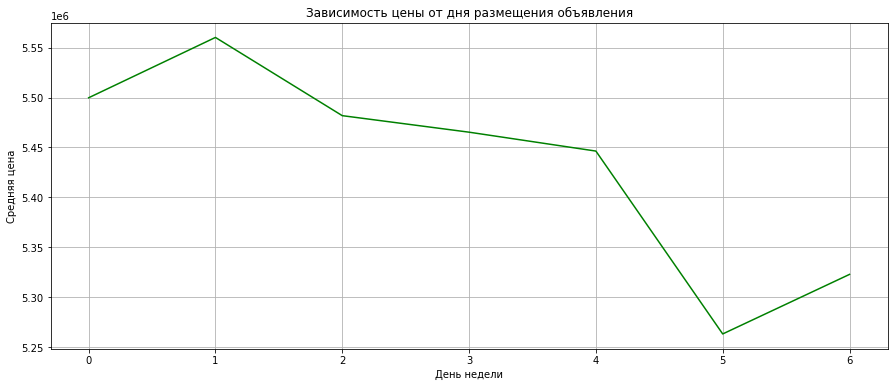

In [131]:
# Зависимость цены от даты размещения (день недели)
(
    df.groupby('day_exposition')['last_price'].mean()
    .plot(kind='line', grid=True, figsize=(15,6), title = 'Зависимость цены от дня размещения объявления', color='green',
          xlabel='День недели', ylabel='Средняя цена')
);

<div class="alert alert-info">
На графике мы видим небольшую разницу в средней цене в 300 000 рублей на выходных.<br>
В течении недели в рабочии дни средняя цена публикуемых объявлений варируется от 5,450 млн. рублей до 5,550 млн. рублей. В выходные наблюдаем снижение цены, так в субботу видим самую низкую цену в 5,250 млн. рублей.<br>
По графику, нельзя сказать, что цена напрямую зависит от дня размещения объявления. Коэффициент корреляции здесь отрицательный и около 0. 
    </div>

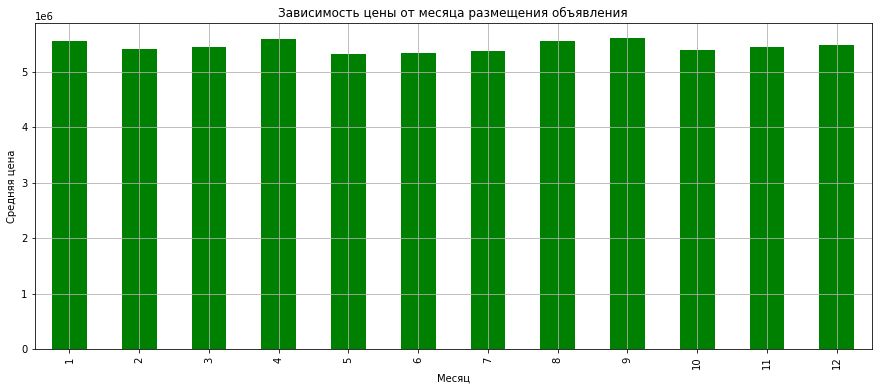

In [132]:
# Зависимость цены от даты размещения (месяц)
(
    df.groupby('month_exposition')['last_price'].mean()
    .plot(kind='bar', grid=True, figsize=(15,6), title = 'Зависимость цены от месяца размещения объявления', color='green',
          xlabel='Месяц', ylabel='Средняя цена')
);

<div class="alert alert-info">
На графике мы видим, что средняя цена на квартиры примерно одинакова в течении года около 5,5 млн. рублей. Резких перепадов (как в большую, так и в меньшую сторону) не наблюдаем. Можно заметить, что в мае цена ниже, чем в другие месяцы, а в апреле и сентябре примерно одинаковы высоки. Какой либо закономерности не наблюдаем.<br>
Коэффициент корреляции здесь тоже отрицательный и около 0.<br>
Прямой зависимости цены от месяца публикации объявления не выявлено.  
    </div>

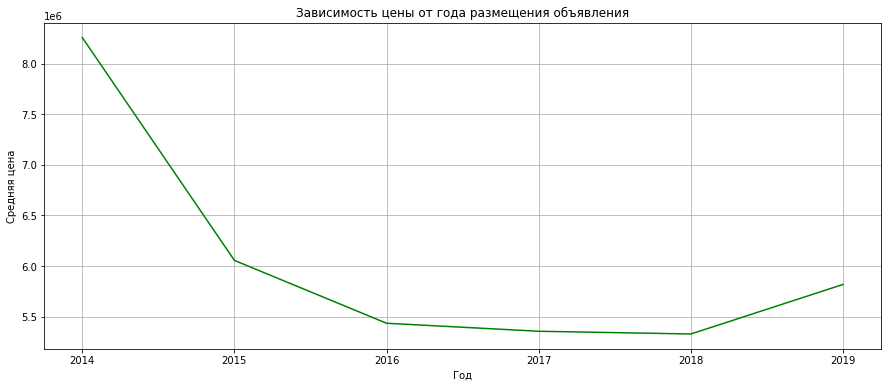

In [133]:
# Зависимость цены от даты размещения (год)
(
    df.groupby('year_exposition')['last_price'].mean()
    .plot(kind='line', grid=True, figsize=(15,6), title = 'Зависимость цены от года размещения объявления', color='green',
          xlabel='Год', ylabel='Средняя цена')
);

<div class="alert alert-info">
На графике мы видим, что в 2014 г. самая высокая средняя цена квартир, выше 8 млн. рублей. В последующие 4 года наблюдается заметное снижение средней цены - меньше 5,5 млн. рублей. В 2019г произошел рост цен, и средняя цена составила около 5,8 млн рублей. <br>
Коэффициент корреляции здесь тоже отрицательный и около 0. В связи с чем, нельзя говорить о прямой зависимости цены от года публикации. Конечно, стоимость квартир в разные годы отличается, но это обусловлено ситуацией на рынке недвижимости, которая ежегодно меняется.
    </div>

##### Пункт 4: 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.<br> 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. <br>

In [134]:
#Определяем 10 населенных пунктов с наибольшим числом объявлений и высчитываем среднюю цену одного квадратного метра
(
    df.groupby ('locality_name')['meter_price'].agg(['count', 'mean']).reset_index()
    .sort_values(by='count', ascending=False).head(10)
)

,locality_name,count,mean
34,Санкт-Петербург,14286,110351.827838
218,поселок Мурино,465,84148.392043
295,поселок Шушары,414,77408.579952
4,Всеволожск,380,68657.389211
33,Пушкин,345,102757.569275
14,Колпино,331,75293.550755
229,поселок Парголово,301,89845.006312
7,Гатчина,297,69260.104040
80,деревня Кудрово,262,91905.957252
5,Выборг,223,58014.171749


In [135]:
#Выделяем населённые пункты с самой высокой стоимостью квадратного метра.
df['locality_name'].loc[df['meter_price'] == df['meter_price'].max()]

4859     Санкт-Петербург
17172    Санкт-Петербург
Name: locality_name, dtype: object

In [136]:
#Выделяем населённые пункты с самой низкой стоимостью квадратного метра.
df['locality_name'].loc[df['meter_price'] == df['meter_price'].min()]

14911    поселок Свирь
Name: locality_name, dtype: object

<div class="alert alert-info">
Мы видим, что в Санкт-Петербурге наибольшее количество объявлений и самая высокая средняя цена за 1м2 = 110 355 рублей. Далее по цене идет г. Пушкин - 102 757 рублей, поселок Мурино - второй по количеству объявлений (находится в 14км от города), там средняя цена за 1м2 = 84 163 рублей. <br>
Квартира с максимальной ценой за 1м2 находится в Санкт-Петербурге, а с минимальной ценой - в поселке Свирь. Если смотреть из топ 10 городов, то там наименьшая средняя цена в Выборге.  
    </div>

##### Пункт 5: 

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.<br>
Изучим, как стоимость объектов зависит от расстояния до центра города.

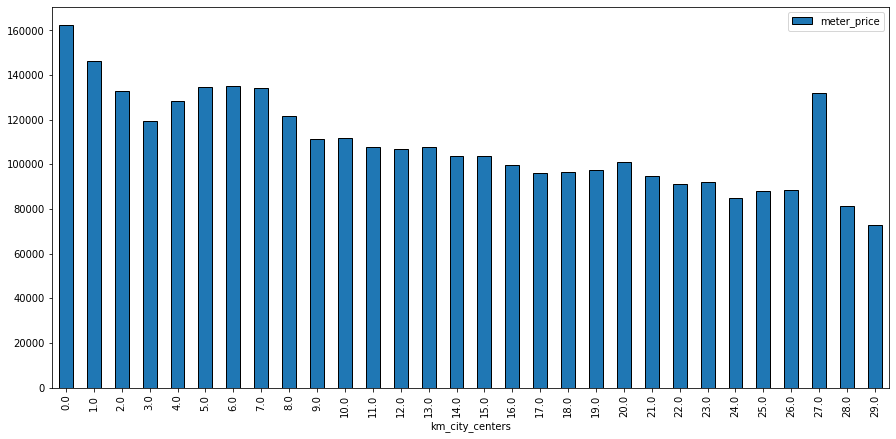

In [137]:
#Выделяем квартиры, находящиеся только в Санкт-Петербурге
t = df.loc[df['locality_name'] == 'Санкт-Петербург']

#Строим график по оси х - расстояние в км от центра, значения - средняя цена за 1м2
( 
    t.pivot_table(index='km_city_centers', values='meter_price', aggfunc='mean')
    .plot(kind='bar', ec='black', figsize=(15,7))
);

<div class="alert alert-info">
На графике мы видим, что на 5-7 км от центра города вновь увеличилась цена за 1м2. Можно предположить, что на этом расстоянии находятся элитные районы города.  Это возможный центр города.<br>
И наблюдаем пик роста цен на 27 км. <br>
Поискав в интернете информацию, видим, что на расстоянии в 27 км находится г. Пушкин  (https://routemaps.ru/r/1198-pushkin-sankt-peterburg/). И ранее мы определили, что в Пушкине цена за 1м2 немного ниже чем в самом Санкт-Петербурге. (Еще раз подтверждается эта информация)
</div>

### Общий вывод


В завершении подводим итоги. <br>

Сперва мы открыли таблицу и посмотрели на данные через гистограммы по каждому столбцу. Сформировали первое видение. <br>


На <b>этапе предобработки данных</b> были проделаны следующие шаги: сперва мы переименовали столбцы по правилам и для нашего удобства.
Затем ознакомились с пропущенными значениями по всем столбцам и начали планомерно обрабатывать их. <br>


- В столбце "Апартаменты" было 88,2% пропусков, что определенно нуждается в дополнительном внимании у коллег, кто давал информацию. А так, мы заполнили пропуски значением "False", предположив, что владельцы обычных квартир просто не стали указывать этот параметр. <br>


- В данных о наличие парков и прудов в пределах 3км, а также растояние до центра города и аэропорта, мы предположили, что есть некая общая закономерность, потому что количество пропусков почти одинаково. И как оказалось, что это пропуски у квартир, которые находятся в небольших населенных пунктах (небольшие города, поселки, деревни), где нет парков и прудов, и оказалось невозможным рассчитать расстояние до центра города и аэропорта. (т.к. данные параметры больше актуальны для квартир в городе Санкт-Петербург и близжайших городов-спутников). 
Эти пропуски заполнять мы не стали. <br>


- Данные по расстояниям до ближайшего парка и пруда (здесь оказалось в три раза больше пропусков). Предположив, что данные параметры не были указаны по причине отсутствия вблизи парка или пруда, стали проверять: есть ли пропуски в данных, где есть поблизости парк или пруд (т.е. не равное 0) - пропусков там не было обнаружено. Следовательно, наличие общих пропусков не влияет на анализ, т.к. у кого парк или пруд рядом есть - там значения заполнены. <br>


- Следующий параметр - количество балконов. Предположив, что владельцы квартир не указывали здесь информацию, потому что 
в их квартирах нет балконов, заменили пропуски на 0. Обработали выбросы в 4-5 балконов, заменив их на 3. <br>
Также поменяли тип данных на целочисленное значение. <br>


- Значения "общее количество этажей". Пропусков оказалось меньше 100 штук. Заполнили их значением "этаж" - т.е. того этажа, на котором находится квартира. 
Также заменили тип значений на целочисленный.<br>


- В значениях "высота потолков" пропусков оказалось почти 40%. Для заполнения данных сделали следующее:<br>
Создали функцию для группировки квартир по категориям этажности домов ("Малоэтажные", "Пятиэтажные", "Многоэтажные", "Дома повышенной этажности", "Высотные дома"). Предположив, что высота потолков в малоэтажных домах может отличаться от высоты потолков в современных высотных домах. Далее создали функцию, которая заполняет пропуски медианным значением по категориям высоты потолков.<br>
Также здесь обнаружили аномально высокие значения и низкие, откоректировали их: большие значения разделили на 10, а низкие потолки - заменили на медианные значения, как делали с пропусками. <br>


- Далее работали с "наименованием населенных пунктов". Провели замену названий для обработки неявных дубликатов (ё на е, 
всех видов поселков на "поселок" , также "садовое товарищество").  <br>
Также обработали часть пропусков: в тех данных, где указано расстояние до центра, то мы  проверили его, если находится в пределах значений по "Санкт-Петербургу", то заменили пропуски на "Санкт-Петербург", остальные пропуски заполнили значением "Unknown".<br>


- "Площадь кухни" и "Жилая площадь".<br>
Для заполнения пропусков мы рассчитывали средний коэффициент искомой площади от общей (по общей площади пропусков не было).
и через него находили пропущенные значения. <br>
Ограничили выборку по минимально допустимым значениям площадей (согласно СНиП-ам): кухня - не менее 5м2, жилая площадь - не менее 14м2.<br>


- Далее по пропускам "количество дней размещения объявления" - заполнять не стали, предположив, что данные квартиры были еще
в процессе продажи на момент формирования таблицы.<br>


Следующим шагом мы обрабатывали аномальные высокие и низкие значения в остальных столбцах, где уже не было пропусков.<br>
В столбце "Последняя цена" - нашли квартиру за 12 190 рублей. Предположив, что имеется в виду "тысяч рублей" - умножили цену на 1000. <br>
Далее с минимальными ценами (просмотрев данные по этим квартирам) ничего делать не стали.<br>
А по максимальным значениям - убрали 1% данных, чтобы не искажали дальнейший анализ, т.к. там оказались квартиры, относящиеся к элитной недвижимости: большие площади, много комнат (свыше 5), непосредственно центр Санкт-Петербурга. <br>


В столбце "количество комнат" мы продолжили очищать данные от элитных квартир - от 5 до 19 комнат. А также разобрались с 0 комнатами - посмотрев значения общей и жилой площади, пришли к предположению, что продают не квартиру целиком, а комнату в квартире (просмотрев предварительно значения "студия", "апартаменты", "открытая планировка") Поэтому решили очистить эти данные. Таким образом, в таблице остались квартиры с 1 - 4 комнатами. <br>


В столбце "общая площадь" мы также продолжили очищать данные от элитной недвижимости с большими площадями (убрав 2 процента квантиля) и оставили минимальные разрешимые значения (от 28 м2). <br>


Со столбцом "этаж" не стали ничего изменять. Также и в столбцах "студия", "открытая планировка". <br>


"Первый день публикации" - здесь мы заменили тип данных на значения даты и времени. Посмотрели, что все выглядит нормальным.<br>

На этом этап предварительной обработки был завершен. Перешли к <b>расчету новых параметров.</b><br>


Так, мы вычислили и добавили цену одного м2 в рублях (разделив цену на общую площадь).<br>
Добавили в таблицу день (0-понедельник, 1-вторник, и т.д.), месяц, год публикации.<br>
Добавили в таблицу тип этажа квартиры (Первый, Последний, Другой).<br>
Расчитали и добавили расстояние в км до центра города.<br>


Переходим к этапу <b>исследовательский анализ данных.</b><br>
Далее детально рассмотрели ряд параметров через гистограммы, описали наблюдаемые явления. <br>
- Итак, по "Общей площади" можно сказать, что пик квартир приходится на 40 м2 (+-5м2) и бОльшая часть  квартир имеет общую площадь в пределах 28-60 м2.<br>
- "Жилая площадь" в 20м2 (+-5м2) встречается у большинства квартир, На втором месте - квартиры с площадью от 30м2 до 38м2. У подавляющей части квартир "площадь кухни" от 5до 10м2. Совсем небольшое количество обладателей просторных кухонь с площадью от 20м2 до 40м2.<br>
- По параметру "цена объекта" мы видим, что основная часть квартир имеет цену до 5-7 млн. рублей. Есть часть недвижимости с ценой свыше 10 млн. рублей.<br>
- По "количеству комнат" двухкомнатных квартир больше остальных среди объявлений, далее идут однокомнатные.<br>
- "Высота потолков": в основном продаются квартиры с высотой потолков до 3 - 3,2 метров.<br>
- "Этаж квартиры": Больше всего квартир расположено на первых четырех этажах. Есть варианты с этажностью выше 10го этажа, а также в высотных домах - свыше 20го этажа<br>
- "Тип этажа квартиры": В основном квартиры расположены в категории "другой" этаж, квартир, находящихся на посленем этаже немного больше, чем на первом.<br>
- "Общее количество этажей в доме": Больше всего квартир находятся в малоэтажных и пятиэтажных домах. Следом идут многоэтажные и высотные дома. Небольшая часть домов с повышенной этажностью.<br>
- "Расстояние до центра города (в метрах)": Большинство квартир находятся на расстоянии от ~7 до 20 км от центра города. Есть квартиры в окрестностях в пределах 30 км, 50 км.<br>
- "Расстояние до ближайшего аэропорта": Есть немного квартир, которые расположены совсем рядом с аэропортом Пулково. Однако же основная часть квартир находятся на расстоянии от 10км до 40 км от аэропорта.<br>
- "Расстояние до ближайшего парка":Из тех объявлений, где указан данный параметр, большинство квартир находятся совсем рядом с парком в пределах 500-1000м.<br>
- "День и месяц публикации объявления": В основном объявления публикуются в будние дни, в выходные - количество в разы меньше. Декабрь и январь лидируют по количествам объявлений в течении года. Самый "неурожайный" месяц - май. Весной публикуют бъявлений немного чаще, чем осенью. Летом меньше всего. <br>
 

Рассмотрим как быстро продавались квартиры. К быстрым продажам мы отнесли срок в 44 дня (почти 1,5 месяца), к необычайно долгим продажам = 226 дней (свыше 7 месяцев), согласно первому и последнему квартилю по данным "days_exposition". Самая быстрая продажа - за 1 день. Самая долгая продажа = 1580 дней (свыше 4 лет). <br>
Согласно графику, в срок за 180 дней (полгода) подавляющее большинство квартир было продано. Доля квартир, продаваемых свыше года, составляет 12% от общего числа проданных.<br>


Далее мы рассмотрели как некоторые факторы (общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, на котором расположена квартира, даты размещения) вляют на стоимость квартиры. Рассмотрели графики зависимости цены от этих параметров, рассчитали коэффициенты корреляции. <br>
В итоге можно сказать, что основным параметром влияющий на итоговую стоимость является общая площадь. Это подтверждает коэффициент корреляции = 0,72 (самое высокое значение среди рассматриваемых значений): высокий коэффициент, прямая зависимость.
(т.е. чем больше площадь, тем выше цена). Данную связь хорошо видно на графике рассеяния. <br>
Количество комнат также имеет прямую зависимость к итоговой стоимости, т.е. чем больше комнат - значит больше площадь - тем дороже квартира, но в данном случае коэффициент корреляции = 0,4, что показывает слабую связь. (Ведь действительно, сейчас строят такие однокомнатные квартиры, которые по площади почти равны и двухкомнатным).<br>
Жилая площадь и площадь кухни также имеют прямую зависимость, но меньшую связь с ценой квартиры.<br>
Так же хочется отметить, что квартиры на первом этаже продаются дешевле, чем на последнем, которые в свою очередь тоже дешевле, чем квартиры на другом этаже (ни на первом, ни на последнем)<br>
Анализ показал, что не важно в какой день недели и месяц было опубликовано объявление, данные параметры не влияют на стоимость квартиры. <br>


Следующем шагом мы определили топ 10 городов с наибольшим количеством объявлений. Среди них рассчитали цену за 1м2. Самая высокая средняя стоимость в Санкт-Петербурге = 110 355 рублей, следом идет г. Пушкин = 102 757 рублей. Самая низкая стоимость - в г. Выборг = 57 906 рублей (если же смотреть по всем населенным пунктам, то минимальная стоимость - в поселке Свирь).<br>


В заключении мы рассчитали цену 1м2 за каждый километр от центра Санкт-Петербурга и вывели на график. Интересным фактом стали наблюдения: рост цены на 5-7 км. от центра, вероятно на этом расстоянии расположены исторические элитные районы города; <br>
а также виден пик цен на 27 км - на таком расстоянии находится г.Пушкин.<br>


Таким образом, мы проанализировали архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, согласно данным Яндекс Недвижимость. Мы выполнили предобработку данных, изучили их, нашли интересные особенности и зависимости, которые существуют на рынке недвижимости.<br>


Чаще всего встречаются объявления:<br>
- общая площадь = 40 м2; <br>
- цена квартиры = 5-7 млн. рублей <br>
- количество комнат = 2; <br>
- тип этажа квартиры - «другой»; <br>
- расстояние до центра города в метрах - от 7 до 20 км.; <br>
- расстояние до ближайшего аэропорта - 10 - 40 км.; <br>


Параметры, которые влияют на стоимость квартиры: в первую очередь общая площадь (наибольший коэффициент корреляции 0,72), 
а также важным фактором влияет этаж, на котором находится квартира (на первом этаже квартиры продаются дешевле, чем на этажах выше первого и ниже последнего)<br>
Конечно, не стоит забывать про удаленность от центра города, чем дальше - тем дешевле (за исключением некоторых районов). <br>


Благодарю за внимание, уделенное данному анализу.     
    